In [76]:
import sys, string, pandas as pd, numpy as np, matplotlib.pyplot as plt

# Exercise 1

## (a) Univariate decision Boundary

![question1a](images/question1a.png)

In [77]:
training_data = pd.read_csv("Dementia_train.csv")
training_data.head()

DX  ADAS13   ABETA    TAU
0  Dementia   24.33   357.4  329.9
1        CN   14.33   550.6  170.5
2        CN    8.00  1647.0  181.1
3        CN   12.33  1526.0  147.8
4        CN   10.00   894.4  254.2

In [78]:
specific_rows = training_data.loc[training_data['DX'] == 'MCI']
print(specific_rows)

      DX  ADAS13   ABETA    TAU
7    MCI   19.67   597.1  294.1
10   MCI   27.00   792.7  664.6
14   MCI   24.67   539.3  270.8
15   MCI   26.67   210.9  142.1
16   MCI   25.67   580.2  374.6
..   ...     ...     ...    ...
351  MCI    7.00  1087.0  113.6
354  MCI   21.00   395.8  319.7
356  MCI   16.00   585.6  153.1
361  MCI   16.00   635.6  191.1
378  MCI   22.00  1213.0  164.1

[203 rows x 4 columns]


In [79]:
specific_rowss = training_data.drop(training_data[training_data['DX'] == 'MCI'].index)
print(specific_rowss)

           DX  ADAS13   ABETA    TAU
0    Dementia   24.33   357.4  329.9
1          CN   14.33   550.6  170.5
2          CN    8.00  1647.0  181.1
3          CN   12.33  1526.0  147.8
4          CN   10.00   894.4  254.2
..        ...     ...     ...    ...
395        CN    7.00   992.8  170.4
396        CN    5.00   731.8  101.2
397        CN    8.00  1700.0  300.1
398        CN   12.00  1665.0  187.1
399        CN    5.00   928.3  375.7

[197 rows x 4 columns]


In [112]:
features = ['ADAS13', 'ABETA', 'TAU']
means = specific_rowss.groupby('DX')[features].mean()
stds = specific_rowss[features].std()

mu_CN = means.loc['CN']
mu_AD = means.loc['Dementia']

decision_boundaries = {}
for feature in features:
    decision_boundaries[feature] = (mu_CN[feature] + mu_AD[feature]) / 2

print("Decision Boundaries:")
print(decision_boundaries)
print(means)

Decision Boundaries:
{'ADAS13': np.float64(19.770520247469065), 'ABETA': np.float64(946.4760911136108), 'TAU': np.float64(305.6051068616423)}
             ADAS13        ABETA         TAU
DX                                          
CN         9.188898  1221.785039  230.633071
Dementia  30.352143   671.167143  380.577143


In [149]:
from sklearn.metrics import accuracy_score, confusion_matrix

test_df = pd.read_csv("Dementia_test.csv")
test_df = test_df[test_df['DX'] != 'MCI']  # Keep only 'CN' and 'Dementia' groups

# Evaluate each feature independently
metrics = {}

for feature in features:
    # Classify based on the single feature decision boundary
    predictions = test_df[feature].apply(lambda x: 'Dementia' if x > decision_boundaries[feature] else 'CN')
    
    # True labels
    true_labels = test_df['DX'].values
    
    # Compute accuracy
    accuracy = accuracy_score(true_labels, predictions)
    
    # Compute confusion matrix
    cm = confusion_matrix(true_labels, predictions, labels=['Dementia', 'CN'])
    
    # Extract sensitivity and specificity
    tp, fn, fp, tn = cm.ravel()
    sensitivity = tp / (tp + fn)  # True Positive Rate
    specificity = tn / (tn + fp)  # True Negative Rate
    
    # Store metrics
    metrics[feature] = {
        'Accuracy': accuracy,
        'Sensitivity': sensitivity,
        'Specificity': specificity
    }

# Print the results for each feature
for feature, metric in metrics.items():
    print(f"Metrics for {feature}:")
    print(f"  Accuracy: {metric['Accuracy']:.2f}")
    print(f"  Sensitivity: {metric['Sensitivity']:.2f}")
    print(f"  Specificity: {metric['Specificity']:.2f}")
    print()

Metrics for ADAS13:
  Accuracy: 0.97
  Sensitivity: 0.94
  Specificity: 1.00

Metrics for ABETA:
  Accuracy: 0.24
  Sensitivity: 0.09
  Specificity: 0.34

Metrics for TAU:
  Accuracy: 0.77
  Sensitivity: 0.67
  Specificity: 0.84



## (b) Linear Regression Boundary

![question1b](images/1b.png)

In [84]:
from sklearn.linear_model import LinearRegression


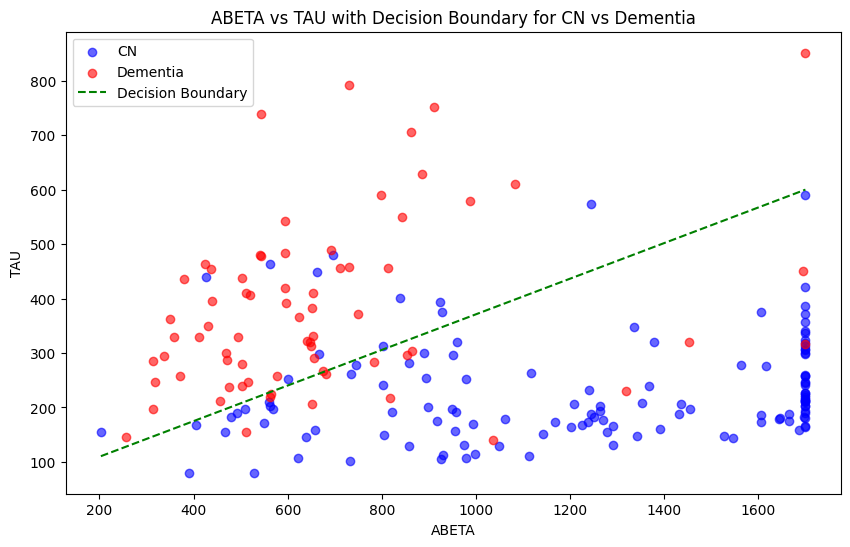

Model Performance on Test Data:
Accuracy: 0.85
Sensitivity: 0.82
Specificity: 0.87


In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the training dataset and filter out MCI subjects
train_df = pd.read_csv("Dementia_train.csv")
train_df = train_df[train_df['DX'] != 'MCI']  # Keep only 'CN' and 'Dementia' groups

# Prepare the input features (ABETA, TAU) and target (binary 0/1 for CN/Dementia)
X_train = train_df[['ABETA', 'TAU']].values
y_train = (train_df['DX'] == 'Dementia').astype(int).values  # 1 for Dementia, 0 for CN

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Compute the decision boundary
# The decision boundary occurs where the model's prediction is 0.5 (threshold for binary classification)
# This translates to a line: ABETA_coef * ABETA + TAU_coef * TAU + intercept = 0.5
# Rearranging, we get: TAU = (-ABETA_coef / TAU_coef) * ABETA + (0.5 - intercept) / TAU_coef
ABETA_coef, TAU_coef = model.coef_
intercept = model.intercept_

# Compute slope and intercept for decision boundary line
slope = -ABETA_coef / TAU_coef
intercept_boundary = (0.5 - intercept) / TAU_coef

# Scatter plot of ABETA vs TAU with the decision boundary
plt.figure(figsize=(10, 6))

# Plot data points with different colors for each group
plt.scatter(train_df[train_df['DX'] == 'CN']['ABETA'], train_df[train_df['DX'] == 'CN']['TAU'], 
            color='blue', label='CN', alpha=0.6)
plt.scatter(train_df[train_df['DX'] == 'Dementia']['ABETA'], train_df[train_df['DX'] == 'Dementia']['TAU'], 
            color='red', label='Dementia', alpha=0.6)

# Plot the decision boundary
abeta_vals = np.linspace(train_df['ABETA'].min(), train_df['ABETA'].max(), 100)
tau_vals = slope * abeta_vals + intercept_boundary
plt.plot(abeta_vals, tau_vals, color='green', linestyle='--', label='Decision Boundary')

# Add labels and legend
plt.xlabel('ABETA')
plt.ylabel('TAU')
plt.legend()
plt.title('ABETA vs TAU with Decision Boundary for CN vs Dementia')
plt.show()

# Evaluate the model on the test dataset
test_df = pd.read_csv("Dementia_test.csv")
test_df = test_df[test_df['DX'] != 'MCI']  # Keep only 'CN' and 'Dementia' groups
X_test = test_df[['ABETA', 'TAU']].values
y_test = (test_df['DX'] == 'Dementia').astype(int).values  # 1 for Dementia, 0 for CN

# Predict probabilities and classify based on threshold of 0.5
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob >= 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Compute confusion matrix to get TP, FN, FP, TN
cm = confusion_matrix(y_test, y_pred, labels=[1, 0])
tp, fn, fp, tn = cm.ravel()

# Calculate sensitivity and specificity
sensitivity = tp / (tp + fn)  # True Positive Rate
specificity = tn / (tn + fp)  # True Negative Rate

print("Model Performance on Test Data:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Sensitivity: {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")


## (c) Multimodal Boundary

![question1c](images/1c.png)

Mean for CN: [1221.78503937  230.63307087]
Mean for MCI: [902.19950739 292.90339901]
Mean for Dementia: [671.16714286 380.57714286]
Covariance Matrix:
               ABETA           TAU
ABETA  204129.482544  -9754.501122
TAU     -9754.501122  20504.646500


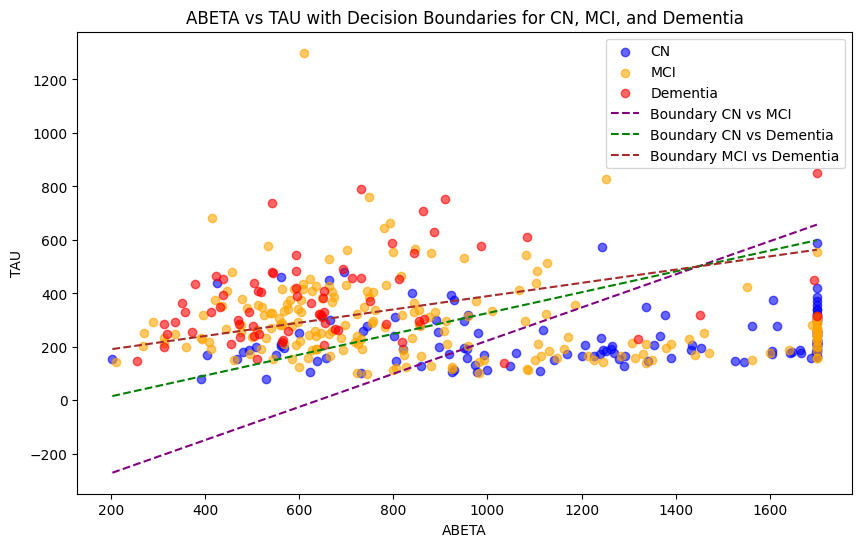

Model Performance for CN vs Dementia:
Accuracy: 0.84
Sensitivity: 0.91
Specificity: 0.80


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix

data_df = pd.read_csv("Dementia_train.csv")

# input features (ABETA, TAU) and target classes
features = ['ABETA', 'TAU']
classes = ['CN', 'MCI', 'Dementia']

#Computing mean vectors and pooled covariance matrix
means = data_df.groupby('DX')[features].mean()
cov_matrix = data_df[features].cov()  # Assumed shared covariance matrix

# Display means for each class
mu_CN = means.loc['CN'].values
mu_MCI = means.loc['MCI'].values
mu_Dementia = means.loc['Dementia'].values
print("Mean for CN:", mu_CN)
print("Mean for MCI:", mu_MCI)
print("Mean for Dementia:", mu_Dementia)

# Display the covariance matrix
print("Covariance Matrix:")
print(cov_matrix)

#function to calculate the linear decision boundary between two classes
def decision_boundary(mu1, mu2, cov_matrix, prior1=0.33, prior2=0.33):
    """Calculate the coefficients for the linear decision boundary."""
    cov_inv = np.linalg.inv(cov_matrix)
    w = cov_inv @ (mu1 - mu2)
    w0 = -0.5 * (mu1 @ cov_inv @ mu1 - mu2 @ cov_inv @ mu2) + np.log(prior1 / prior2)
    return w, w0

# decision boundary parameters for each pair of classes
w_CN_MCI, w0_CN_MCI = decision_boundary(mu_CN, mu_MCI, cov_matrix)
w_CN_Dementia, w0_CN_Dementia = decision_boundary(mu_CN, mu_Dementia, cov_matrix)
w_MCI_Dementia, w0_MCI_Dementia = decision_boundary(mu_MCI, mu_Dementia, cov_matrix)

# Scatter plot of ABETA vs TAU with decision boundaries
plt.figure(figsize=(10, 6))

# data points with different colors for each group
colors = {'CN': 'blue', 'MCI': 'orange', 'Dementia': 'red'}
for cls in classes:
    subset = data_df[data_df['DX'] == cls]
    plt.scatter(subset['ABETA'], subset['TAU'], color=colors[cls], label=cls, alpha=0.6)

# Defining the range for ABETA values in the plot
abeta_vals = np.linspace(data_df['ABETA'].min(), data_df['ABETA'].max(), 100)

# Plotting each decision boundary as a line
# CN vs MCI
tau_vals_CN_MCI = (-w_CN_MCI[0] / w_CN_MCI[1]) * abeta_vals - (w0_CN_MCI / w_CN_MCI[1])
plt.plot(abeta_vals, tau_vals_CN_MCI, color='purple', linestyle='--', label='Boundary CN vs MCI')

# CN vs Dementia
tau_vals_CN_Dementia = (-w_CN_Dementia[0] / w_CN_Dementia[1]) * abeta_vals - (w0_CN_Dementia / w_CN_Dementia[1])
plt.plot(abeta_vals, tau_vals_CN_Dementia, color='green', linestyle='--', label='Boundary CN vs Dementia')

# MCI vs Dementia
tau_vals_MCI_Dementia = (-w_MCI_Dementia[0] / w_MCI_Dementia[1]) * abeta_vals - (w0_MCI_Dementia / w_MCI_Dementia[1])
plt.plot(abeta_vals, tau_vals_MCI_Dementia, color='brown', linestyle='--', label='Boundary MCI vs Dementia')

# Add labels and legend
plt.xlabel('ABETA')
plt.ylabel('TAU')
plt.legend()
plt.title('ABETA vs TAU with Decision Boundaries for CN, MCI, and Dementia')
plt.show()
# Load the test dataset
test_df = pd.read_csv("Dementia_test.csv")
test_df = test_df[test_df['DX'] != 'MCI']  # Only CN and Dementia for evaluation

X_test = test_df[features].values
y_test = (test_df['DX'] == 'Dementia').astype(int).values  # 1 for Dementia, 0 for CN

# Classifying based on CN vs Dementia decision boundary
w = w_CN_Dementia
w0 = w0_CN_Dementia
y_pred = (X_test @ w + w0 >= 0).astype(int)

# Calculate accuracy
accuracy = 1-(accuracy_score(y_test, y_pred))

# Compute confusion matrix to get TP, FN, FP, TN
cm = confusion_matrix(y_test, y_pred, labels=[1, 0])
tp, fn, fp, tn = cm.ravel()

# Calculate sensitivity and specificity
sensitivity = 1-(tp / (tp + fn))  # True Positive Rate
specificity = 1-(tn / (tn + fp))  # True Negative Rate

print("Model Performance for CN vs Dementia:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Sensitivity: {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")


# Exercise 2: Logistic Regression

## (a) Logistic Regression with IWLS

![question2a](images/2a.png)

In [1]:
import sys, string, pandas as pd, numpy as np, matplotlib.pyplot as plt
from scipy.special import expit

def sigmoid(value):
    return expit(value)

In [2]:
def fit_LogReg_IWLS(y, features, eps=0.0000001):
    #sample size
    N = features.shape[0]
    #feature dim
    p = features.shape[1] + 1
    #initalize beta with 0s
    betas = np.zeros(p)

    #add column of 1 to features to get our X matrix
    X = np.c_[np.ones(N),features]
    #compute predictions for class 1: linear combination between input (X) and
    # coefficients (betas) passed through the sigmoid function
    prob1 = sigmoid( X @ betas)
    #compute predictions for class 0 (1.0 - prob1)
    prob0 = 1.0 - prob1
    #COMPLETE THIS CODE:
    W = np.diag(prob0*(1.0 - prob0))
    old_loglike = 100000
    #compute LogLikelihood:
    #COMPLETE THIS CODE:
    loglike = np.sum(y * np.log(prob1) + (1 - y) * np.log(prob0))
    niter=0
    while np.abs(loglike - old_loglike) > eps:
        #update betas:
        #COMPLETE THIS CODE
        z = X @ betas + np.linalg.pinv(W) @ (y-prob1)
        #COMPLETE THIS CODE
        betas_new = np.linalg.pinv(X.transpose() @ W @ X) @ X.transpose() @ W @ z
        betas = betas_new
        prob1 = sigmoid( X @ betas)
        prob0 = 1.0 - prob1
        #make both probs 'stable'
        prob1[prob1 == 0.0] = 10**-10
        prob0[prob0 == 0.0] = 10**-10

        #COMPLETE THIS CODE:
        W = np.diag(prob0*(1.0 - prob0))
        old_loglike = loglike
        #COMPLETE THIS CODE:
        loglike = np.sum(y * np.log(prob1) + (1 - y) * np.log(prob0))
        niter += 1
    print("Total iterations: " + str(niter))
    return(betas)



In [3]:
training_data = pd.read_csv("LogReg_data.csv")
training_data.head()
X = training_data.drop(columns=['DX']).values
y = training_data['DX'].values


In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

log_coeff = fit_LogReg_IWLS(y,X_standardized)
log_coeff = log_coeff[:-1]
print(log_coeff)
print(log_coeff.shape)

Total iterations: 26
[  70.42581809  -37.82943458  -78.36042399  115.94593493   58.10963691
  -47.55887627   93.31063304  -47.07455677   36.97861227  -72.56073399
    3.01569203  -13.79498444  -20.3977132    73.08513108   45.77013154
  -12.72149688    6.31908794   25.27866195    4.61037826   -7.01476886
  -27.12543787   79.81628277    8.35633216   67.20332907  -25.9360382
    4.71422969   47.73065238  -44.57906438    5.21356641  -15.30736206
   22.65736869  -32.39658195    0.30389035   69.55125109   17.78487005
   45.91007606   -6.72956511  -63.81055665   89.67790607   43.99892593
 -103.42146271  -13.61129353  -13.14932744  -49.20163491  -50.47879868
  -19.19738482    2.56560325  -38.02488656  -28.84240033   24.22385213
   -8.06154997  -25.67637033    3.43418035   13.8904934    31.12720226
  -23.19254177  -21.52026479  -32.75034591   27.34585456  -36.33620405
  -21.65351989  -16.65542786   -1.90486839   41.70077082    3.00877053
   -1.7700577   -48.38266398  -20.94549769    7.76914965 

In [6]:
from sklearn.linear_model import LogisticRegression

"""clf = LogisticRegression(penalty=None , solver='saga', max_iter=26)
clf.fit(X,y)
print("Coefficients:", clf.coef_)"""

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

model = LogisticRegression(penalty=None ,solver='lbfgs',max_iter=26)
model.fit(X_standardized, y)  # Pass X without the manually added intercept
beta_sklearn = np.concatenate([[model.intercept_[0]], model.coef_.flatten()])
coeff_sklearn = model.coef_[0]
print(coeff_sklearn)



[-42.40315589 -37.5600197   59.85811662  57.26565661 -42.29826869
  52.52957617  -7.74701541  16.14328156 -28.95062834   6.7930829
 -24.84271748  10.08065106  21.52763924  35.29925887  -3.2223629
   0.86226162   6.69848791   3.74733573  -5.30436123   0.38285351
  46.00023434  -4.40626789  55.29593307 -15.6284009    9.71372158
  56.17781691 -29.59447954 -12.31110186   7.4211759    7.78438102
 -31.27501926  -2.47383709  44.10990786  10.69391929  45.84841191
 -14.96863741 -40.13258852  66.05732977  35.71253874 -94.94604932
 -26.37065869 -13.51329261 -45.20070211 -32.37288668 -15.54719016
  18.12869967 -25.03470601  -8.97472563  15.82878888 -27.70223062
  -3.78127695  11.81287196  15.11044102  12.51477056  -3.06527695
 -13.77704709 -27.14494423   6.141723   -24.11922698  -9.91690926
 -25.51408991   9.21764953  13.82863126  -9.3600932   -9.19431211
 -29.28015893  -3.05893768 -10.73375325  10.44207906  25.17339583
  28.71224597 -26.22286378  -2.83264936  26.35801614  34.79368313
 -42.4098058

c:\Users\PEGO\Downloads\materialsm\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C:\Users\PEGO\Documents\ipykernel_25880\978541236.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0].legend()


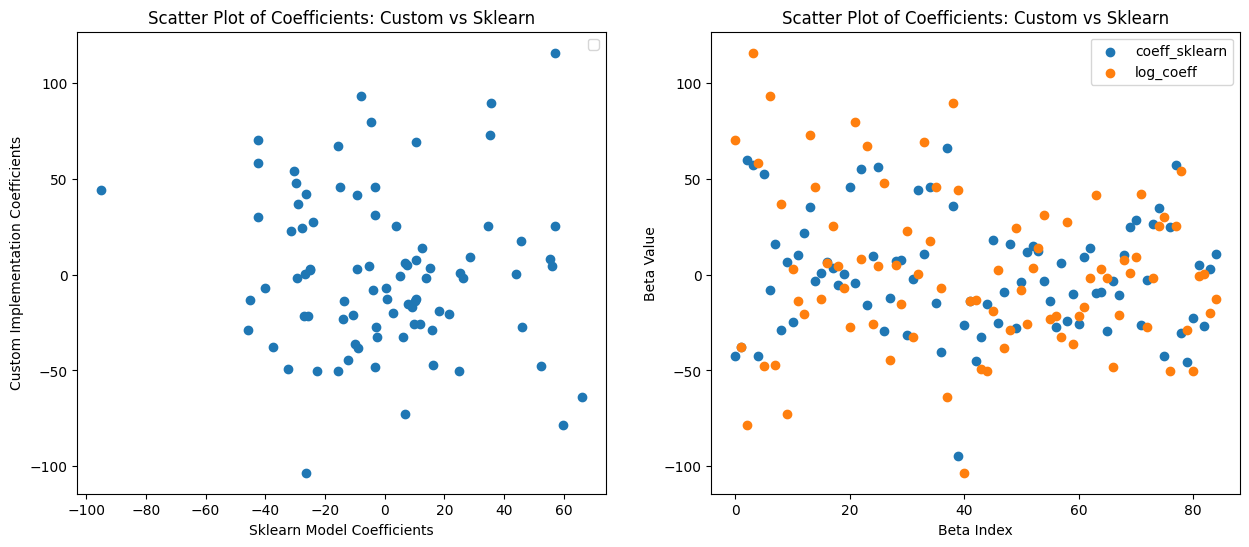

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Loss over iterations
axs[0].scatter(coeff_sklearn,log_coeff)
axs[0].set_xlabel("Sklearn Model Coefficients")
axs[0].set_ylabel("Custom Implementation Coefficients")
axs[0].set_title("Scatter Plot of Coefficients: Custom vs Sklearn")
axs[0].legend()

# Plot 2: Scatter plot of beta coefficients
axs[1].scatter(range(len(coeff_sklearn)), coeff_sklearn, label="coeff_sklearn")
axs[1].scatter(range(len(log_coeff)), log_coeff, label="log_coeff")
axs[1].set_xlabel("Beta Index")
axs[1].set_ylabel("Beta Value")
axs[1].set_title("Scatter Plot of Coefficients: Custom vs Sklearn")
axs[1].legend()

There is a strong overall agreement between IWLS (log_coeff) and sklearn's logistic regression (coeff_sklearn) in terms of coefficient trends and signs, indicating that both implementations are solving the problem effectively.

## (b) Logistic Regression with gradient descent

![question2b](images/2b.png)

In [8]:
import numpy as np
from scipy.special import expit

def sigmoid(value):
    return expit(value)

In [9]:
#implements gradient descent for a fixed number of iterations
#alpha is the learning rate
#retunrs the beta coefficiencts
#and the loss history
#def fit_LogReg_GRAD(y, features, alpha=0.001, max_iter=1000)
def fit_LogReg_GRAD(y, features, alpha=0.1, max_iter=3000):
    #sample size
    N = features.shape[0]
    #feature dim
    p = features.shape[1] + 1
    #initalize beta with 0s
    betas = np.zeros(p)

    #add column of 1 to X
    X = np.c_[np.ones(N),features]
    #compute predictions for class 1
    prob1 = sigmoid( X @ betas)
    #compute predictions for class 2
    prob0 = 1.0 - prob1

    #compute the cost (J) of the current solution
    #COMPLETE THIS LINE
    cost = -(1/N) * np.sum(y * np.log(prob1) + (1 - y) * np.log(prob0))
    loss = []
    niter = 0
    while niter < max_iter:
        #beta update (one step of the gradient descent)
        #COMPLETE THIS LINE
        #betas = betas - alpha*(1/N) * np.sum(prob1 - y) @ X
        betas = betas - alpha*((1 / N) * X.T @ (prob1 - y))
        prob1 = sigmoid( X @ betas)
        prob0 = 1.0 - prob1
        #make both probs 'stable'
        prob1[prob1 == 0.0] = 10**-10
        prob0[prob0 == 0.0] = 10**-10

        #recompute cost
        #COMPLETE THIS LINE
        cost = -(1/N) * np.sum(y * np.log(prob1) + (1 - y) * np.log(prob0))
        loss.append(cost)
        niter += 1
    res = {}
    res["betas"] = betas
    res["loss"] = loss
    print("total iterations: " + str(niter))
    x = res["betas"]
    print(x.shape)
    return(res)

total iterations: 3000
(86,)
Total iterations: 26


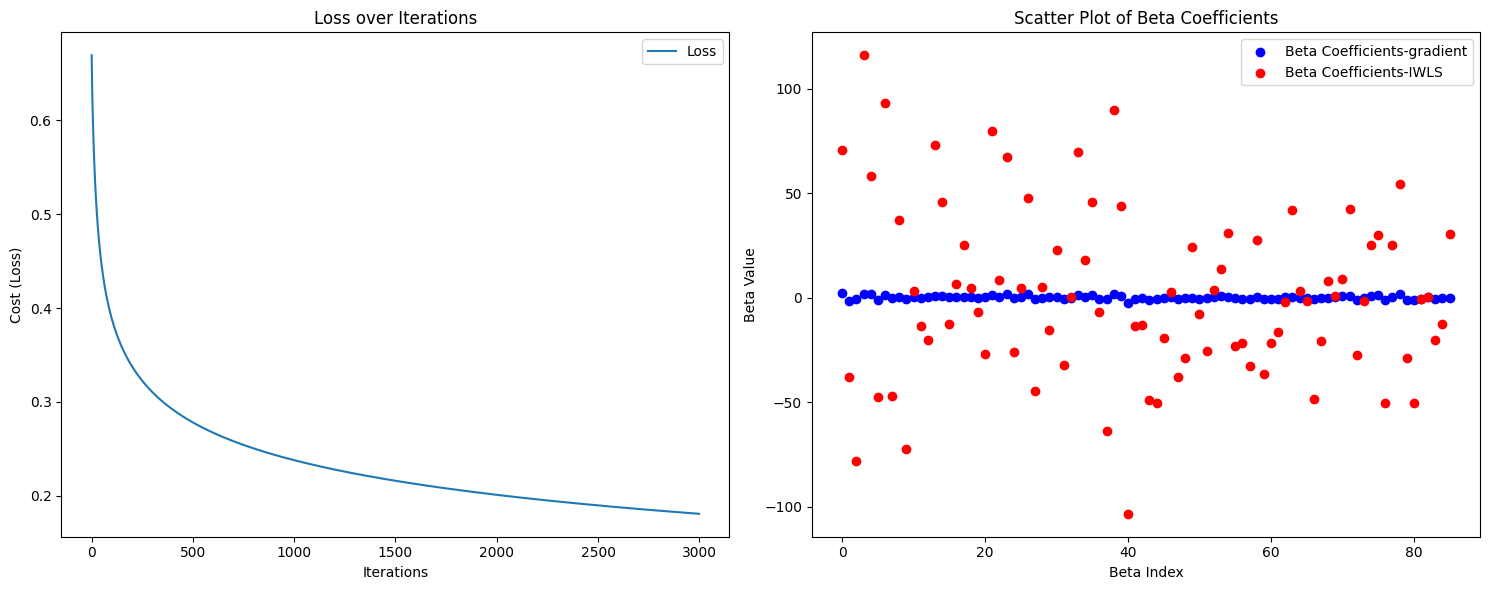

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
result = fit_LogReg_GRAD(y,X_standardized)
result_IWLS = fit_LogReg_IWLS(y,X_standardized)

loss_history = result["loss"]
betas = result["betas"]

betas_IWLS = result_IWLS

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Loss over iterations
axs[0].plot(range(len(loss_history)), loss_history, label="Loss")
axs[0].set_xlabel("Iterations")
axs[0].set_ylabel("Cost (Loss)")
axs[0].set_title("Loss over Iterations")
axs[0].legend()

# Plot 2: Scatter plot of beta coefficients
axs[1].scatter(range(len(betas)), betas, c="blue", label="Beta Coefficients-gradient")
axs[1].scatter(range(len(betas_IWLS)), betas_IWLS, c="red", label="Beta Coefficients-IWLS")
axs[1].set_xlabel("Beta Index")
axs[1].set_ylabel("Beta Value")
axs[1].set_title("Scatter Plot of Beta Coefficients")
axs[1].legend()

# Adjust layout
plt.tight_layout()
plt.show()


The beta coefficients from gradient descent appear to be tightly clustered around zero.The beta coefficients from IWLS exhibit larger variability, with values distributed both positively and negatively and some large coefficients.
Gradient Descent: Produces smaller, more conservative coefficients, possibly due to slower convergence since there is no regularization used.
IWLS: Produces larger coefficients, which may better capture feature importance but can also lead to overfitting if not regularized.

## (c) Logistic Regression with Gradient Descent and Momentum

![question2c](images/2c.png)

In [96]:
#implements gradient descent with momentum for a fixed number of iterations
#alpha is the learning rate
#gamma is the factor for momentum
#returns the beta coefficiencts
#and the loss history
def fit_LogReg_GRAD_momentum(y, features, alpha=0.001, gamma=0.9, max_iter=3000):
#def fit_LogReg_GRAD_momentum(y, features, alpha=0.001, gamma=0.9, max_iter=1000):
    #sample size
    N = features.shape[0]
    #feature dim
    p = features.shape[1] + 1
    #initalize beta with 0s
    betas = np.zeros(p)

    #add column of 1 to X
    X = np.c_[np.ones(N),features]
    #compute predictions for class 1
    prob1 = sigmoid( X @ betas)
    #compute predictions for class 2
    prob0 = 1.0 - prob1

    #compute the cost (J) of the current solution
    #COMPLETE THIS LINE
    cost = -(1/N) * np.sum(y * np.log(prob1) + (1 - y) * np.log(prob0))
    niter = 0
    loss = []
    while niter < max_iter:
        #beta update (one step of the gradient descent)
        #COMPLETE THIS LINE
        betas = betas - alpha*(1-gamma)*((1 / N) * X.T @ (prob1 - y))
        prob1 = sigmoid( X @ betas)
        prob0 = 1.0 - prob1
        #make both probs 'stable'
        prob1[prob1 == 0.0] = 10**-10
        prob0[prob0 == 0.0] = 10**-10

        old_cost = cost
        #recompute cost
        #COMPLETE THIS LINE
        cost = -(1/N) * np.sum(y * np.log(prob1) + (1 - y) * np.log(prob0))
        niter += 1
        loss.append(cost)
    res = {}
    res["betas"] = betas
    res["loss"] = loss
    print("total iterations: " + str(niter))
    return(res)

In [97]:
Syn_Momentum_data = pd.read_csv("Syn_Momentum.csv")
Syn_Momentum_data.head()
X = Syn_Momentum_data.drop(columns=['y']).values
y = Syn_Momentum_data['y'].values

total iterations: 3000


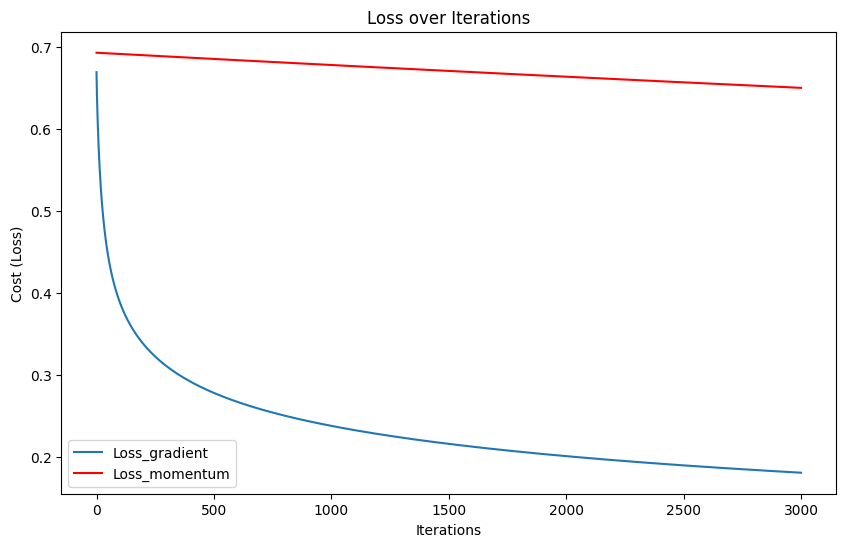

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
result_momentum = fit_LogReg_GRAD_momentum(y,X_standardized)

loss_history_momentum = result_momentum["loss"]

plt.figure(figsize=(10, 6))
plt.plot(range(len(loss_history)), loss_history, label="Loss_gradient")
plt.plot(range(len(loss_history_momentum)), loss_history_momentum, label="Loss_momentum",color="red")
plt.xlabel("Iterations")
plt.ylabel("Cost (Loss)")
plt.title("Loss over Iterations")
plt.legend()
plt.show()

Gradient descent showed a rapid/sharp decrease then the curve flattens showing a slow convergence.The loss with momentum showed a slower decrease which flattens out too.The gradient descent method outperforms momentum-based optimization, achieving faster convergence and a lower final loss.
Momentum introduces a velocity term to smooth updates, which can cause slower progress early on if gradients change direction often or if the learning rate and momentum coefficient are poorly chosen.
Poor tuning of hyperparameters can prevent momentum-based optimization from realizing its full potential.

## (d) Competing Objectives

![question2d](images/2d.png)

In [13]:
#implements gradient descent for a fixed number of iterations
#y is the target variable
#y2 is the variable to be avoided
#delta is the tradoff between the loss for objective1 (i.e., fit y) and objective2 (i.e., don't fit y2)
#alpha is the learning rate
#returns the beta coefficiencts
#and the loss history

def fit_LogReg_GRAD_competing(y, y2, features, delta, alpha=0.001, max_iter=1000):
    #sample size
    N = features.shape[0]
    #feature dim
    p = features.shape[1] + 1
    #initalize beta with 0s
    betas = np.zeros(p)

    #add column of 1 to X
    X = np.c_[np.ones(N),features]
    #compute predictions for class 1
    prob1 = sigmoid( X @ betas)
    #compute predictions for class 2
    prob0 = 1.0 - prob1

    #compute the cost (J) of the current solution
    #COMPLETE THIS LINE
    cost_y = -(1 / N) * np.sum(y * np.log(prob1) + (1 - y) * np.log(1 - prob1))
    cost_y2 = -(1 / N) * np.sum(y2 * np.log(prob1) + (1 - y2) * np.log(1 - prob1))

# Combined cost using mean
    cost = delta * cost_y + (1 - delta) * cost_y2 
    niter = 0
    loss = []
    while niter < max_iter:
        #beta update (one step of the gradient descent)
        gradient_y = (1 / N) * X.T @ (prob1 - y)       # Gradient for y
        gradient_y2 = (1 / N) * X.T @ (prob1 - y2)      # Gradient for y2
        
        # Combined gradient based on delta
        combined_gradient = delta * gradient_y + (1 - delta) * gradient_y2
        
        #COMPLETE THIS LINE
        betas = betas - alpha * combined_gradient
        #betas =
        prob1 = sigmoid( X @ betas)
        prob0 = 1.0 - prob1
        #make both probs 'stable'
        prob1[prob1 == 0.0] = 10**-10
        prob0[prob0 == 0.0] = 10**-10
        old_cost = cost
        #recompute cost
        cost_y = -(1 / N) * np.sum(y * np.log(prob1) + (1 - y) * np.log(1 - prob1))
        cost_y2 = -(1 / N) * np.sum(y2 * np.log(prob1) + (1 - y2) * np.log(1 - prob1))
        #COMPLETE THIS LINE
    
        cost = delta * cost_y + (1 - delta) * cost_y2
        niter += 1
        loss.append(cost)
    res = {}
    res["betas"] = betas
    res["loss"] = loss
    print("total iterations: " + str(niter))
    return(res)

In [ ]:
sim_data = pd.read_csv("sim_competitive.csv")
sim_data.head()
X =  sim_data[['x1', 'x2']]
y1 = sim_data['y1']
y2 = sim_data['y2']


total iterations: 1000
total iterations: 1000
total iterations: 1000
total iterations: 1000


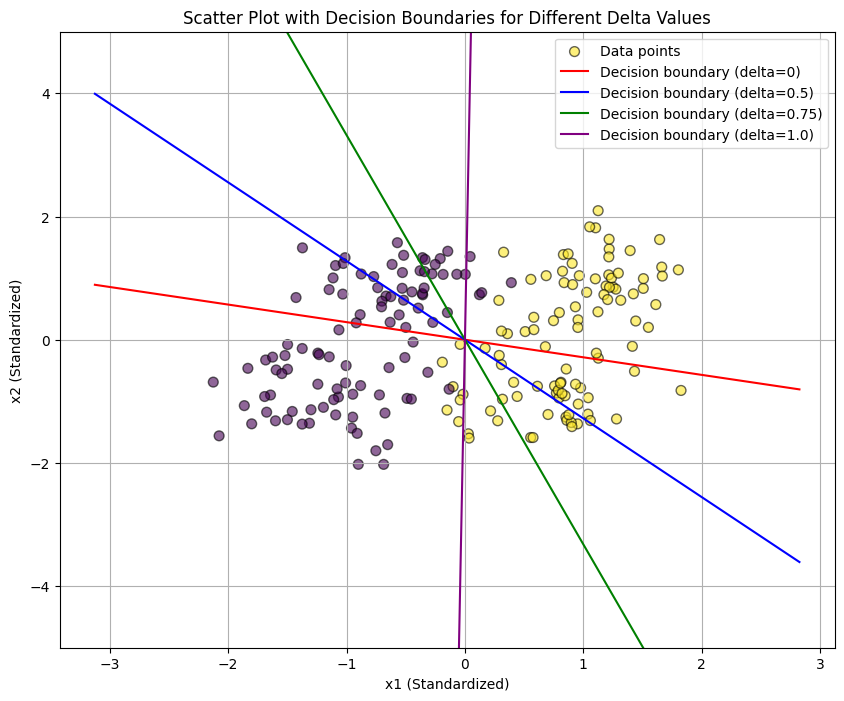

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load dataset
sim_data = pd.read_csv("sim_competitive.csv")

# Separate features and labels
X = sim_data[['x1', 'x2']].values  # Convert to NumPy array for consistent slicing
y1 = sim_data['y1'].values  # Convert to NumPy array
y2 = sim_data['y2'].values  # Convert to NumPy array

# Standardize features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Define deltas for trade-off
deltas = [0, 0.5, 0.75, 1.0]

# Store models for each delta
models = {}

# Fit logistic regression models for different delta values
# Fit logistic regression models for different delta values
for delta in deltas:
    result = fit_LogReg_GRAD_competing(y1, y2, X_standardized, delta=delta)
    models[delta] = result["betas"]  # Access "betas" from the dictionary in the result tuple

# Scatter plot of data points
plt.figure(figsize=(10, 8))
plt.scatter(
    X_standardized[:, 0],  # First feature (x1)
    X_standardized[:, 1],  # Second feature (x2)
    c=y1,  # Color based on y1
    cmap="viridis",
    #color="yellow",
    edgecolor="k",
    s=50,
    alpha=0.6,
    label="Data points",
)

# Add decision boundaries for each delta
x_values = np.linspace(X_standardized[:, 0].min() - 1, X_standardized[:, 0].max() + 1, 100)

colors = ['red', 'blue', 'green', 'purple']
for i, delta in enumerate(deltas):
    # Get betas for this delta
    betas = models[delta]
    
    # Calculate y values for the decision boundary line where X * betas = 0
    y_values = -(betas[0] + betas[1] * x_values) / betas[2]  # Assuming betas[0] is intercept, betas[1], betas[2] for x1, x2
    
    # Plot decision boundary
    plt.plot(x_values, y_values, color=colors[i], label=f"Decision boundary (delta={delta})")

# Set plot labels and title
plt.ylim(-5, 5)
plt.xlabel("x1 (Standardized)")
plt.ylabel("x2 (Standardized)")
plt.title("Scatter Plot with Decision Boundaries for Different Delta Values")
plt.legend()
plt.grid(True)
plt.show()


# Exercise 3: Prostate segmentation

In [63]:
#useful to unzip the data when working on Colab
import zipfile
unzip_data = True

if unzip_data:
  with zipfile.ZipFile("./promise1215.zip", 'r') as zip_ref:
    zip_ref.extractall("./")

In [99]:
import imageio.v3
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from skimage.filters import gabor, scharr, difference_of_gaussians
from skimage.feature import local_binary_pattern
from sklearn.feature_extraction import image
from sklearn.metrics import roc_auc_score
import sklearn
import os
import gc

In [100]:
data_path = './'
train_path= data_path + "train/"
test_path= data_path + "test/"
vali_path= data_path + "validate/"

In [101]:
#read image from path
def rimg(pt, num, sl=15):
    img_f = pt + "img_" + str(num).zfill(2) + "_" + str(sl).zfill(2) + ".png"
    msk_f = pt + "lab_" + str(num).zfill(2) + "_" + str(sl).zfill(2) + ".png"
    im  = imageio.v3.imread(img_f)
    msk = imageio.v3.imread(msk_f)
    return (im, msk)

In [102]:
#read image '04' from the training path
img, msk = rimg(train_path, 4)

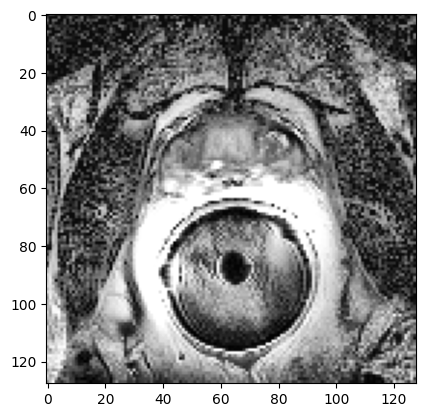

In [5]:
plt.imshow(img, cmap="gray")

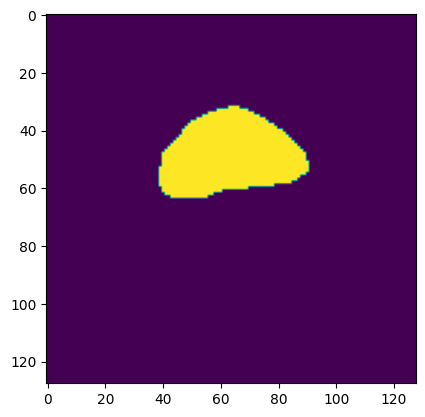

In [6]:
plt.imshow(msk)

In [103]:
#this function takes an input image and
#does the manual feature extraction
#if the variable nchan is sset to True, then the return is just the number of channels

def preprocess_img(img, nchan=False):

  #raw image and Scharr filter
  res = np.dstack( (img, scharr(img) ) )

  #add a series fo Gabor filters
  for frq in [0.2, 0.4, 0.6, 0.8]:
    for j in range(4):
      a, b = gabor(img, frq, theta=np.pi/4 * j)
      res = np.dstack( (res, np.sqrt(a**2 + b**2) ))
  #LBP
  radius = 3
  n_points = 8 * radius
  lbp = local_binary_pattern(img, n_points, radius, method='uniform')

  #difference of gaussians
  dog = difference_of_gaussians(img, low_sigma=1, high_sigma=3)

  res = np.dstack( (res, lbp, dog))

  #if nchan is True, then just return the number of channels
  #the pre-processing produces
  if nchan:
    try:
      return(res.shape[2])
    except IndexError:
      return(1)
  return (res)

In [104]:
#turn the images into a training dataset
#train_path:    path to the training data
#n_train_patch: number of patches to be extracted per image
#ps :           patch size as integer (e.g., 7 -> 7x7 patches)
#chan:          number of 'channels' the pre_processed image will have

def create_training_set(train_path, n_train_patch, ps, chan, verbose=True):
  if verbose:
    print("Extracting " + str(n_train_patch) + " pataches of size " + str(ps) + "x" + str(ps) + " from each image.")

  #dimension of square patch
  patch_dim = (ps, ps)
  #center of the patch
  patch_cnt = int((ps-1)/2)
  #dimension of the 'flattened' patch

  flat_dim = ps*ps*chan

  #initialize Y and X
  Y = []
  X = np.empty((0,flat_dim))
  
  #img_files = [f for f in os.listdir(train_path) if f.startswith("img_")]
  #length = len(img_files)

  for s in np.arange(30):
    if verbose:
      print("Extracting data from subject: " + str(s))

    img_m, msk_x = rimg(train_path, s)

    #binarize the mask
    msk = (msk_x > 0) * 1

    #extract features
    frames = preprocess_img(img_m)
    #add the labels as an additional channel
    frames = np.dstack((frames, msk))

    #sample patches
    patch = image.extract_patches_2d(frames, patch_dim, max_patches=n_train_patch)

    #each patch receives the label of the center value in the 'label' channel
    Y_tmp = patch[:,patch_cnt,patch_cnt,chan] == 1
    #turn patches into a matrix where each row corresponds to all the features
    #of one patch
    X_tmp = np.reshape(patch[:,:,:,0:chan],(n_train_patch,flat_dim))

    #concatenate with Y and X
    Y.extend(Y_tmp)
    X = np.concatenate((X, X_tmp), axis=0)

    #clear some memory
    patch = None
    X_tmp = None
    Y_tmp = None
    gc.collect()
  return (Y, X)

In [105]:
#this function takes X and Y as input and
#oversamples the target class ('1') with a ratio:1 ratio (default: None)
# if ratio is None, then it will be set to 1/f, where f is the frequency
# of the target class
#from the overall size of X a sub_sample of 'sample_size' is randomly selected
def sub_sample(X, Y, sample_size=10000, ratio=None):
    #compute class 1 frequency
    rtclass = np.sum(Y)/len(Y)
    if ratio is None:
        ratio = 1.0/rtclass
        print("sampling with ratio 1:" + str(ratio))
    weights = np.array([1] * len(Y))
    weights[Y] = ratio
    weights = weights/np.sum(weights)

    #sample sample_size of the generated patches
    idx = np.random.choice(X.shape[0],sample_size,replace=False, p=np.array(weights))

    Xsub = X[idx,:]
    Ysub = np.array(Y)[idx]

    #return subsets of X, Y and the selection index
    return Xsub, Ysub, idx

In [106]:
#set number of patches
#set patch size
n_train_patch = 1000
ps = 21

In [151]:
#get the number of channels
nchan = preprocess_img(img, True)
print(nchan)

20


In [108]:
#create the dataset from the 30 training images
Y, X = create_training_set(train_path, n_train_patch, ps, nchan)

Extracting 1000 pataches of size 21x21 from each image.
Extracting data from subject: 0
Extracting data from subject: 1
Extracting data from subject: 2
Extracting data from subject: 3
Extracting data from subject: 4
Extracting data from subject: 5
Extracting data from subject: 6
Extracting data from subject: 7
Extracting data from subject: 8
Extracting data from subject: 9
Extracting data from subject: 10
Extracting data from subject: 11
Extracting data from subject: 12
Extracting data from subject: 13
Extracting data from subject: 14
Extracting data from subject: 15
Extracting data from subject: 16
Extracting data from subject: 17
Extracting data from subject: 18
Extracting data from subject: 19
Extracting data from subject: 20
Extracting data from subject: 21
Extracting data from subject: 22
Extracting data from subject: 23
Extracting data from subject: 24
Extracting data from subject: 25
Extracting data from subject: 26
Extracting data from subject: 27
Extracting data from subject: 

In [109]:
#subsample as per instructions
Xsub, Ysub, sub_idx = sub_sample(X, Y, 1000)

sampling with ratio 1:9.038867128653209


In [110]:
#the initial X and Y matrices are quite large and
#clutter the memory, we don't require these for further processing
#so setting them to None and calling the garbage collector
#will preserve resources
import gc
X = None
Y = None
gc.collect()

0

## (a) Train SVC with linear, polynomial and RBF kernel

![question3a](images/3a.png)

In [111]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.metrics import roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt


In [152]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(Xsub, Ysub, test_size=0.2, random_state=42, stratify=Ysub)


In [113]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_sub_stand = scaler.fit_transform(Xsub)

# Define parameter grid for SVC
param_grid = {
    'kernel': ['linear','rbf', 'poly'],  # Kernel types to test
    'C': [0.1, 1, 10, 100, 1000],  # Range of C values
    'degree': [3]  # Degree for polynomial kernel (only used if kernel='poly')
}

# Initialize SVC model
svc = SVC(probability=True)  # Enable probability output for ROC AUC calculation

# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(svc, param_grid, scoring='roc_auc', cv=cv, verbose=1, n_jobs=-1)
grid_search.fit(X_sub_stand, Ysub)


Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'degree': [3],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='roc_auc', verbose=1)

In [153]:
# Best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Evaluate on validation set
y_val_proba = best_model.predict_proba(X_val)[:, 1]
roc_auc = roc_auc_score(y_val, y_val_proba)
print("Validation ROC AUC Score:", roc_auc)


Best Parameters: {'C': 10, 'degree': 3, 'kernel': 'rbf'}
Validation ROC AUC Score: 0.5


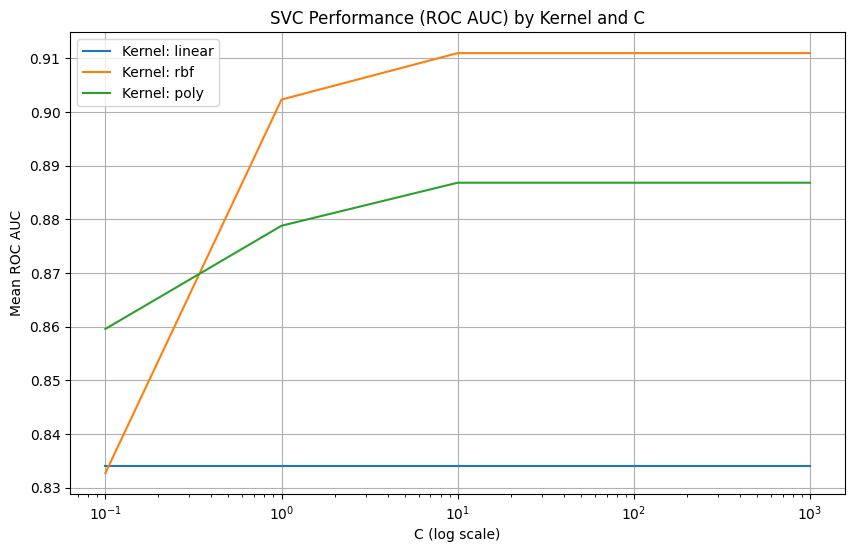

In [116]:
# Extract GridSearchCV results
results = pd.DataFrame(grid_search.cv_results_)

# Plot ROC AUC vs. C for each kernel
plt.figure(figsize=(10, 6))
for kernel in results['param_kernel'].unique():
    kernel_results = results[results['param_kernel'] == kernel]
    plt.plot(kernel_results['param_C'], kernel_results['mean_test_score'], label=f"Kernel: {kernel}")

plt.xscale('log')  # Logarithmic scale for C
plt.xlabel("C (log scale)")
plt.ylabel("Mean ROC AUC")
plt.title("SVC Performance (ROC AUC) by Kernel and C")
plt.legend()
plt.grid(True)
plt.show()


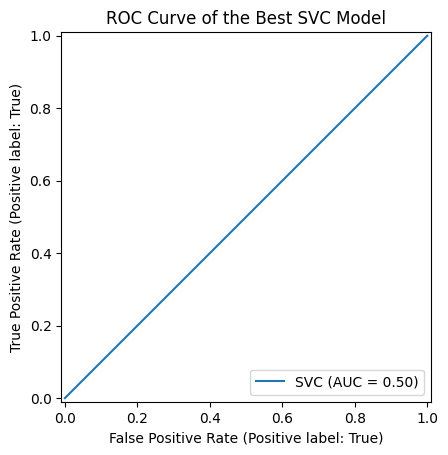

In [120]:
# Plot the ROC curve
RocCurveDisplay.from_estimator(best_model, Xsub, Ysub)
plt.title("ROC Curve of the Best SVC Model")
plt.show()


## (b) Apply to validation data, compute DICE and AUC

![question3b](images/3b.png)

In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import imageio.v3
from skimage.filters import scharr, difference_of_gaussians
from skimage.feature import local_binary_pattern
from skimage.filters import gabor
import gc
from sklearn.decomposition import PCA
from sklearnex import patch_sklearn

patch_sklearn()


def extract_patches_and_labels(img, mask, patch_size=21):
    """
    Extract patches from the 3D image and assign labels using the ground truth mask.
    """
    h, w, c = img.shape 
    ps = patch_size
    patch_cnt = ps // 2

    patches = []
    labels = []

    for y in range(patch_cnt, h - patch_cnt):
        for x in range(patch_cnt, w - patch_cnt):
            # Extract patch from the 3D image
            patch = img[y - patch_cnt:y + patch_cnt + 1, x - patch_cnt:x + patch_cnt + 1, :]
            patches.append(patch)

            # Assign label based on the ground truth mask (center pixel)
            label = mask[y, x]
            labels.append(label)

    # Convert to NumPy arrays
    patches = np.array(patches, dtype=np.float32)  # Reduce precision
    labels = np.array(labels)

    return patches, labels

def predict_segmentation(model, img, ps=21):
    """
    Predict segmentation mask for a single image using the SVM model.
    """
    h, w = img.shape[:2]  # Ensure height and width are used only
    patch_cnt = ps // 2
    pred_mask = np.zeros((h, w))

    # Preprocess the image
    features = preprocess_img(img)

    # Iterate over each pixel and predict for each patch
    for y in range(patch_cnt, h - patch_cnt):
        for x in range(patch_cnt, w - patch_cnt):
            patch = features[y - patch_cnt:y + patch_cnt + 1, x - patch_cnt:x + patch_cnt + 1, :]
            patch_flat = patch.reshape(1, -1)  # Flatten patch
            if patch_flat.shape[1] != model.n_features_in_:
                raise ValueError(f"Patch size mismatch: Expected {model.n_features_in_}, got {patch_flat.shape[1]}")
            pred_mask[y, x] = model.predict(patch_flat).item()

    return pred_mask

def calculate_metrics(true_mask, pred_mask):
    """
    Calculate Dice coefficient and ROC AUC for a predicted mask.
    """
    true_flat = true_mask.flatten()
    pred_flat = pred_mask.flatten()

    # Dice coefficient
    intersection = np.sum(pred_mask * true_mask)
    dice_score = (2 * intersection) / (np.sum(pred_mask) + np.sum(true_mask) + 1e-6)

    # ROC AUC
    roc_auc = roc_auc_score(true_flat, pred_flat)

    return dice_score, roc_auc


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [ ]:
# Train the SVM model
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_sub_stand = scaler.fit_transform(Xsub)
X_flattened = Xsub.reshape(Xsub.shape[0], -1)
svc_model = SVC(C=10, kernel='rbf', degree=3, probability=True, random_state=1)
svc_model.fit(Xsub, Ysub)
print("SVM training completed.")

SVM training completed.


Processing image 1/10...


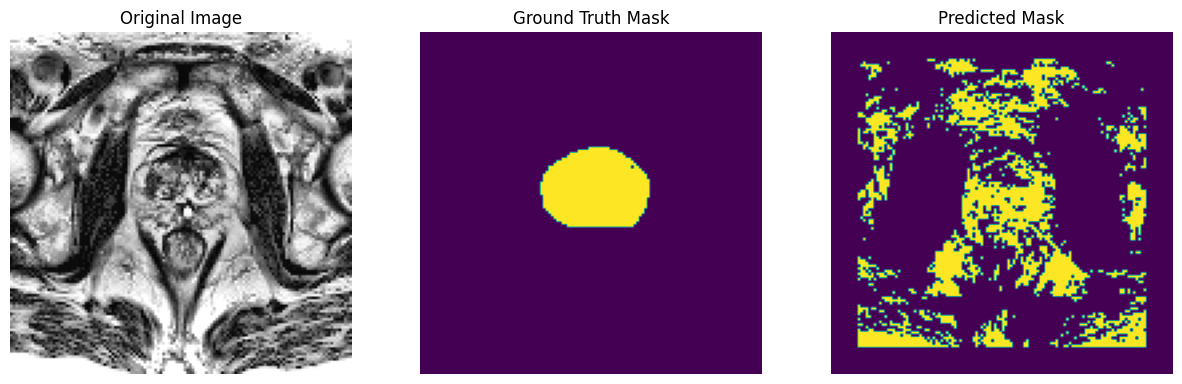

Processing image 2/10...


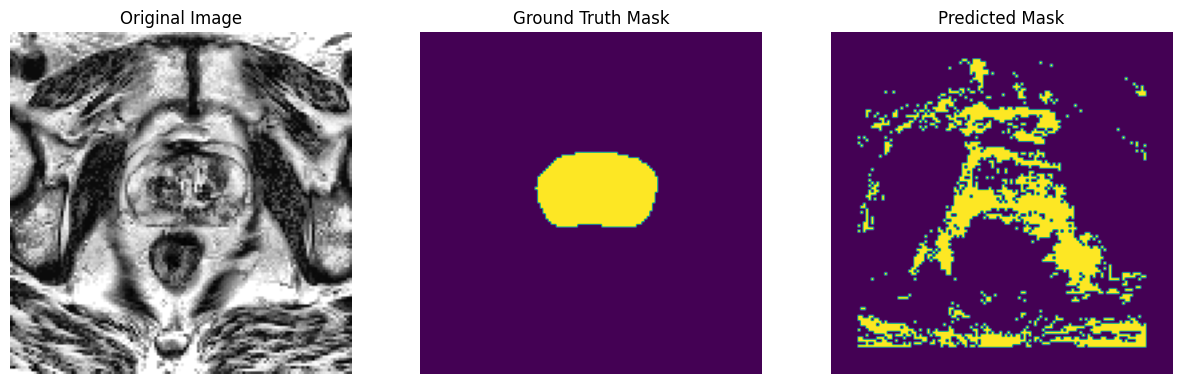

Processing image 3/10...


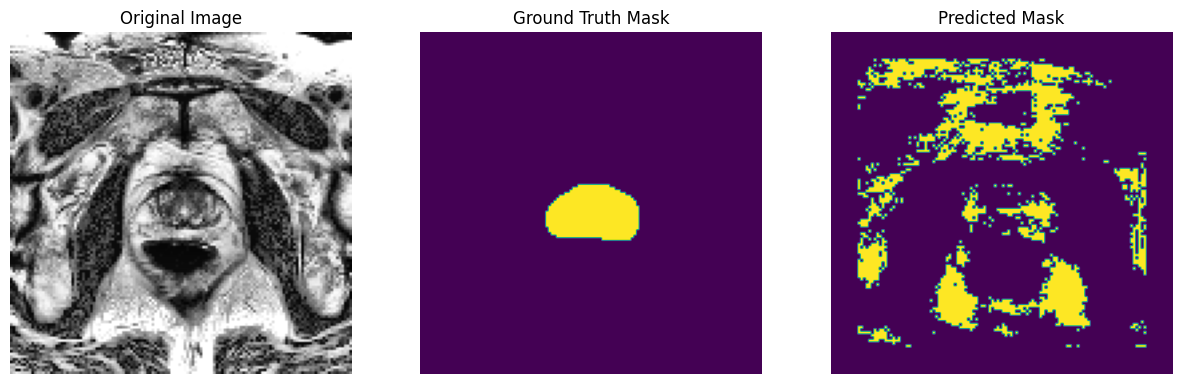

Processing image 4/10...


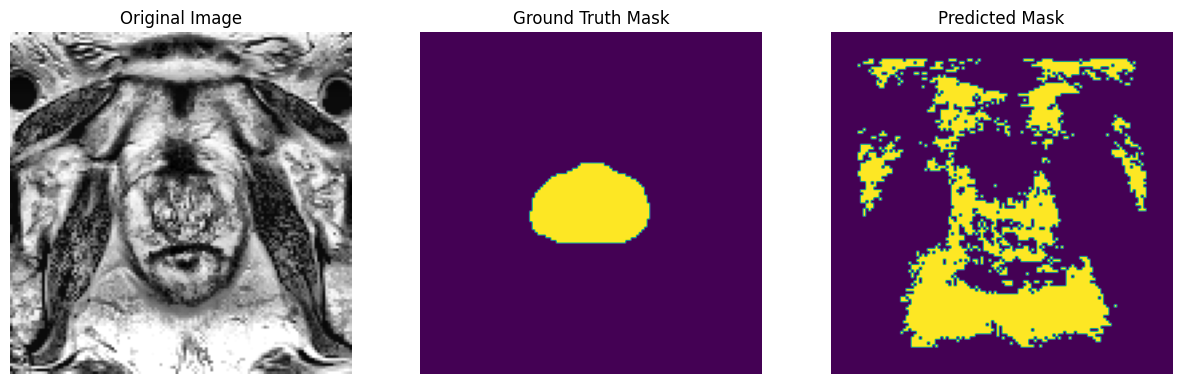

Processing image 5/10...


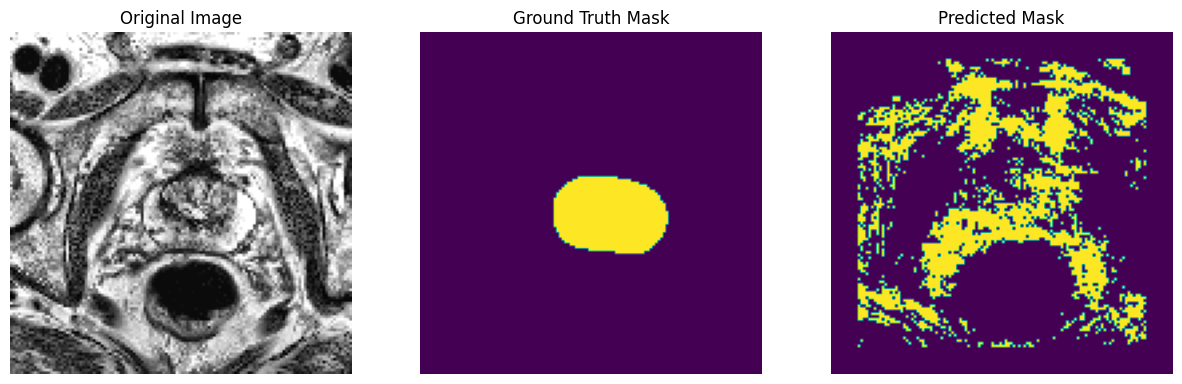

Processing image 6/10...
Processing image 7/10...
Processing image 8/10...
Processing image 9/10...
Processing image 10/10...
Average Dice Coefficient: 0.2679
Average ROC AUC: 0.7005


In [ ]:

# Evaluate on validation data
roc_aucs, dice_scores = [], []

for i in range(10): 
    print(f"Processing image {i + 1}/10...")
    img, mask = rimg(vali_path, i+30)  # Load validation image and mask
    pred_mask = predict_segmentation(svc_model, img, ps=21)  # Predict mask

    # Calculate metrics
    dice_score, roc_auc = calculate_metrics(mask, pred_mask)
    dice_scores.append(dice_score)
    roc_aucs.append(roc_auc)

    # Visualization (for first few images)
    if len(roc_aucs) <= 5:
        plt.figure(figsize=(15, 5))
        plt.subplot(1, 3, 1)
        plt.imshow(img, cmap='gray')
        plt.title("Original Image")
        plt.axis("off")

        plt.subplot(1, 3, 2)
        plt.imshow(mask)
        plt.title("Ground Truth Mask")
        plt.axis("off")

        plt.subplot(1, 3, 3)
        plt.imshow(pred_mask)
        plt.title("Predicted Mask")
        plt.axis("off")
        plt.show()

# Step 4: Report overall metrics
print(f"Average Dice Coefficient: {np.mean(dice_scores):.4f}")
print(f"Average ROC AUC: {np.mean(roc_aucs):.4f}")


## (c) train a tree-based classifier

![question3c](images/3c.png)

In [ ]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix

X_flattened = Xsub.reshape(Xsub.shape[0], -1)  # Flatten each 21x21xchannels patch into a 1D array

model_rand = RandomForestClassifier(n_estimators=100, random_state=22)
model_rand.fit(Xsub, Ysub)

RandomForestClassifier(random_state=22)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score


# Initialize the model
gbt = GradientBoostingClassifier(
    n_estimators=100,   
    learning_rate=0.1,  
    max_depth=3,        
    random_state=42     
)

# Train the model
gbt.fit(Xsub, Ysub)


GradientBoostingClassifier(random_state=42)

Processing image 1/10...


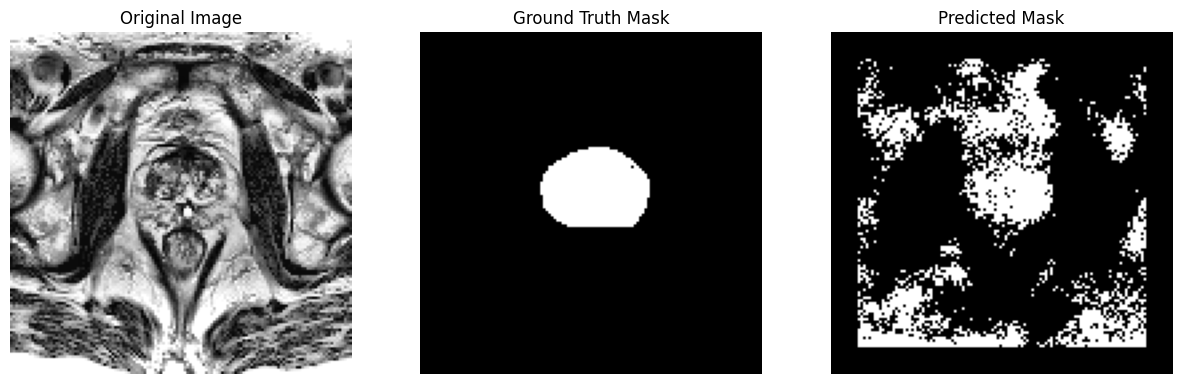

Processing image 2/10...


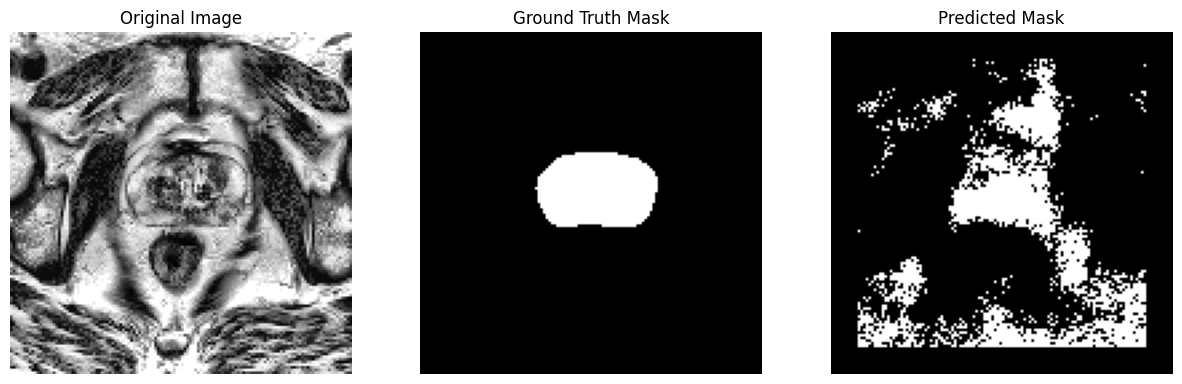

Processing image 3/10...


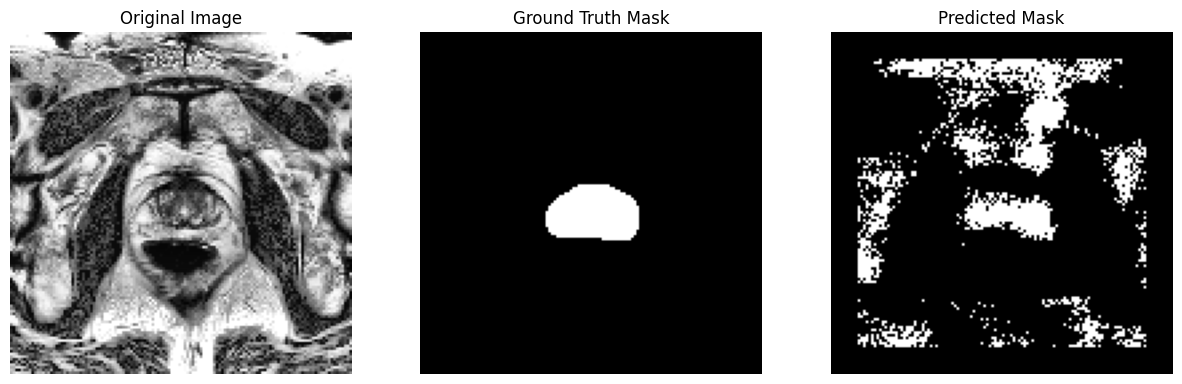

Processing image 4/10...


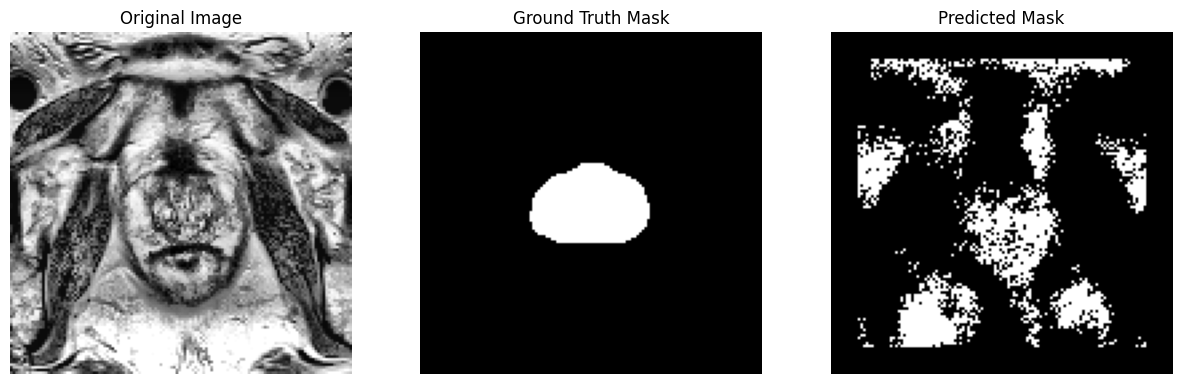

Processing image 5/10...


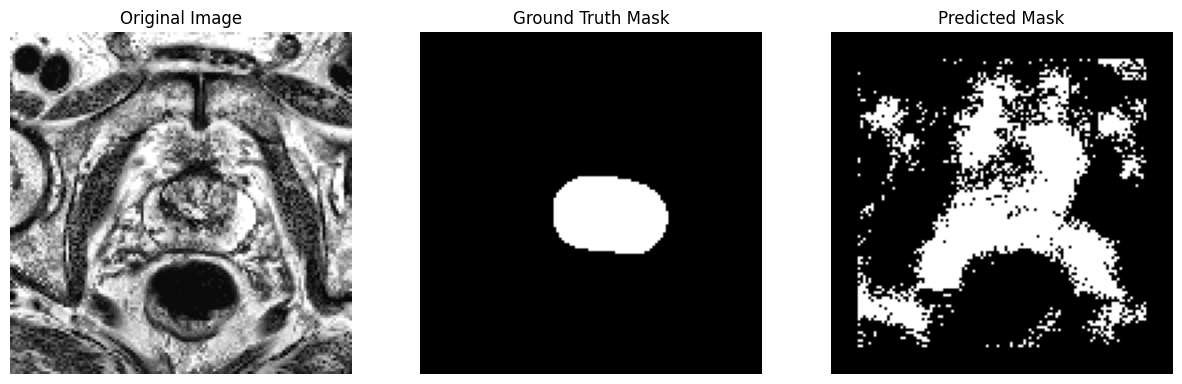

Processing image 6/10...
Processing image 7/10...
Processing image 8/10...
Processing image 9/10...
Processing image 10/10...
Average Dice Coefficient: 0.3236
Average ROC AUC: 0.7457


In [155]:
#Evaluate on validation data
roc_aucs, dice_scores = [], []

for i in range(10):  
    print(f"Processing image {i + 1}/10...")
    img, mask = rimg(vali_path, i+30)  # Load validation image and mask
    pred_mask = predict_segmentation(model_rand, img, ps=21)  # Predict mask

    # Calculate metrics
    dice_score, roc_auc = calculate_metrics(mask, pred_mask)
    dice_scores.append(dice_score)
    roc_aucs.append(roc_auc)

    # Visualization (for first few images)
    if len(roc_aucs) <= 5:
        plt.figure(figsize=(15, 5))
        plt.subplot(1, 3, 1)
        plt.imshow(img, cmap='gray')
        plt.title("Original Image")
        plt.axis("off")

        plt.subplot(1, 3, 2)
        plt.imshow(mask, cmap='gray')
        plt.title("Ground Truth Mask")
        plt.axis("off")

        plt.subplot(1, 3, 3)
        plt.imshow(pred_mask, cmap='gray')
        plt.title("Predicted Mask")
        plt.axis("off")
        plt.show()
# Overall metrics
print(f"Average Dice Coefficient: {np.mean(dice_scores):.4f}")
print(f"Average ROC AUC: {np.mean(roc_aucs):.4f}")

For the tree-based ensemble, Random forest is faster to train and apply than the gradient boosted trees therefore I went with Random Forests. Based on the metrics,i.e The ROC AUC score and the Dice Coefficient, the Tree-based Ensemble performs better than the SVC. Tree-based ensemble has an average Dice Coefficient of 0.32 and, average ROC AUC  of 0.75 while the SVC has an average Dice Coefficient of 0.25 and, average ROC AUC  of 0.70. Moreoverthe Tree-based are faster to train and apply compared to the SVC. 
Reasons:
1.Tree Ensembles aggregate multiple models' predictions, which tends to improve both accuracy and robustness.The datasets become large therefore SVM become slow to implement.
2.Tree Ensembles avoid computationally expensive operations like kernel calculations or solving optimization problems and the depth of trees used was not deep to prevent overfitting issues and hence easier training and implementation.
3.They can model non-linear relationships and interactions between features effectively.
4.Parallelization in ensemble methods further speeds up training.

## (d) Explore sample / patch sizes

![question3d](images/3d.png)

c:\Users\PEGO\Downloads\materialsm\.venv\Lib\site-packages\skimage\feature\texture.py:360: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


Evaluating Patch Size: 11, Subsample Size: 500...
Extracting 1000 pataches of size 11x11 from each image.
Extracting data from subject: 0
Extracting data from subject: 1
Extracting data from subject: 2
Extracting data from subject: 3
Extracting data from subject: 4
Extracting data from subject: 5
Extracting data from subject: 6
Extracting data from subject: 7
Extracting data from subject: 8
Extracting data from subject: 9
Extracting data from subject: 10
Extracting data from subject: 11
Extracting data from subject: 12
Extracting data from subject: 13
Extracting data from subject: 14
Extracting data from subject: 15
Extracting data from subject: 16
Extracting data from subject: 17
Extracting data from subject: 18
Extracting data from subject: 19
Extracting data from subject: 20
Extracting data from subject: 21
Extracting data from subject: 22
Extracting data from subject: 23
Extracting data from subject: 24
Extracting data from subject: 25
Extracting data from subject: 26
Extracting da

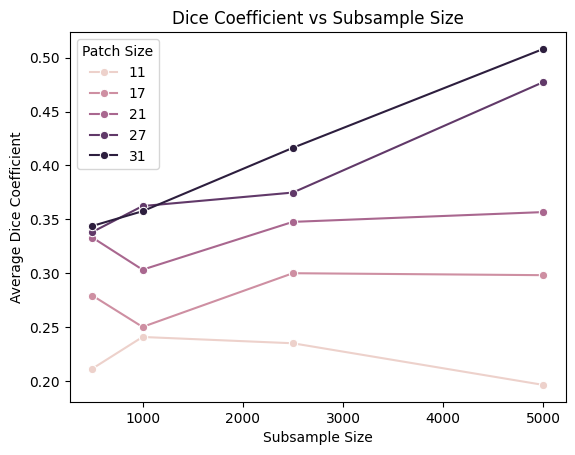

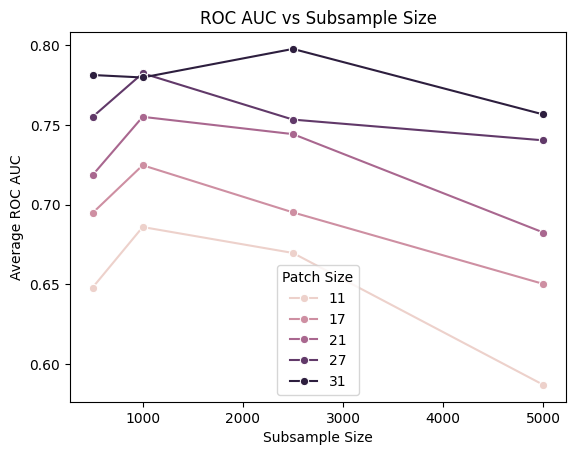

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction import image
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import pandas as pd


data_path = './'
train_path = data_path + "train/"
vali_path = data_path + "validate/"

patch_sizes = [11, 17, 21, 27, 31]  # Patch sizes to explore
subsample_sizes = [500, 1000, 2500, 5000]  # Subsample sizes to explore
n_train_patch = 1000  # Patches to extract per image

# Get the number of channels from preprocessing
channels = preprocess_img(np.zeros((128, 128)), nchan=True)

results = []

for patch_size in patch_sizes:
    for subsample_size in subsample_sizes:
        print(f"Evaluating Patch Size: {patch_size}, Subsample Size: {subsample_size}...")

        # Create training set
        Y, X = create_training_set(train_path, n_train_patch, patch_size, channels)

        # Subsample the data
        Xsub, Ysub, _ = sub_sample(X, Y, sample_size=subsample_size)

        # Train the Random Forest
        rf_model = RandomForestClassifier(n_estimators=100, random_state=1)
        rf_model.fit(Xsub, Ysub)

        # Evaluate on validation data
        dice_scores = []
        roc_aucs = []

        for val_idx in range(30,40):  
            img, mask = rimg(vali_path, val_idx)  # Load validation image and mask
            img_processed = preprocess_img(img)  # Preprocess the image

            # Extract patches from the validation image
            patch_dim = (patch_size, patch_size)
            patch_cnt = patch_size // 2
            frames = preprocess_img(img)
            patches = image.extract_patches_2d(frames, patch_dim)

            # Predict labels for patches
            patches_flat = patches[:, :, :, :channels].reshape(patches.shape[0], -1)
            pred_labels = rf_model.predict(patches_flat)

            # Reconstruct the mask from predicted labels
            pred_mask = np.zeros_like(mask)
            valid_rows = mask.shape[0] - 2 * patch_cnt
            valid_cols = mask.shape[1] - 2 * patch_cnt
            patch_idx = 0
            for y in range(patch_cnt, patch_cnt + valid_rows):
                for x in range(patch_cnt, patch_cnt + valid_cols):
                    pred_mask[y, x] = pred_labels[patch_idx]
                    patch_idx += 1

            # Ensure predicted mask is binary
            pred_mask = (pred_mask > 0.5).astype(int)

            # Ensure mask shapes match
            assert mask.shape == pred_mask.shape, f"Shapes mismatch: {mask.shape} vs {pred_mask.shape}"

            # Calculate metrics
            dice = (2 * np.sum(pred_mask * mask)) / (np.sum(pred_mask) + np.sum(mask) + 1e-6)
            
            # Handle single-class cases for ROC AUC
            if np.unique(mask).size < 2:
                print(f"Skipping ROC AUC for validation image {val_idx} due to single-class ground truth.")
                roc_auc = np.nan
            else:
                roc_auc = roc_auc_score(mask.flatten(), pred_mask.flatten())
            
            dice_scores.append(dice)
            roc_aucs.append(roc_auc)

        # Average metrics, ignoring NaNs
        avg_dice = np.nanmean(dice_scores)
        avg_roc_auc = np.nanmean(roc_aucs)

        results.append({
            "patch_size": patch_size,
            "subsample_size": subsample_size,
            "average_dice": avg_dice,
            "average_roc_auc": avg_roc_auc
        })

        print(f"Patch Size: {patch_size}, Subsample Size: {subsample_size}, "
              f"Avg Dice: {avg_dice:.4f}, Avg ROC AUC: {avg_roc_auc:.4f}")

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Plot Dice Coefficient
sns.lineplot(data=results_df, x="subsample_size", y="average_dice", hue="patch_size", marker="o")
plt.title("Dice Coefficient vs Subsample Size")
plt.xlabel("Subsample Size")
plt.ylabel("Average Dice Coefficient")
plt.legend(title="Patch Size")
plt.show()

# Plot ROC AUC
sns.lineplot(data=results_df, x="subsample_size", y="average_roc_auc", hue="patch_size", marker="o")
plt.title("ROC AUC vs Subsample Size")
plt.xlabel("Subsample Size")
plt.ylabel("Average ROC AUC")
plt.legend(title="Patch Size")
plt.show()



## (e) Prediction post-processing

![question3e](images/3e.png)

c:\Users\PEGO\Downloads\materialsm\.venv\Lib\site-packages\skimage\feature\texture.py:360: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


Training Random Forest with Patch Size: 21, Subsample Size: 5000...
Extracting 1000 pataches of size 21x21 from each image.
Extracting data from subject: 0
Extracting data from subject: 1
Extracting data from subject: 2
Extracting data from subject: 3
Extracting data from subject: 4
Extracting data from subject: 5
Extracting data from subject: 6
Extracting data from subject: 7
Extracting data from subject: 8
Extracting data from subject: 9
Extracting data from subject: 10
Extracting data from subject: 11
Extracting data from subject: 12
Extracting data from subject: 13
Extracting data from subject: 14
Extracting data from subject: 15
Extracting data from subject: 16
Extracting data from subject: 17
Extracting data from subject: 18
Extracting data from subject: 19
Extracting data from subject: 20
Extracting data from subject: 21
Extracting data from subject: 22
Extracting data from subject: 23
Extracting data from subject: 24
Extracting data from subject: 25
Extracting data from subject

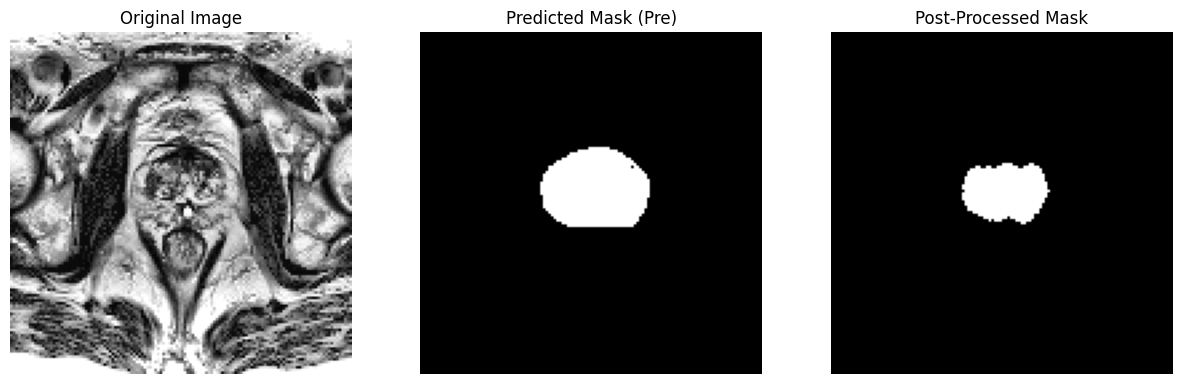

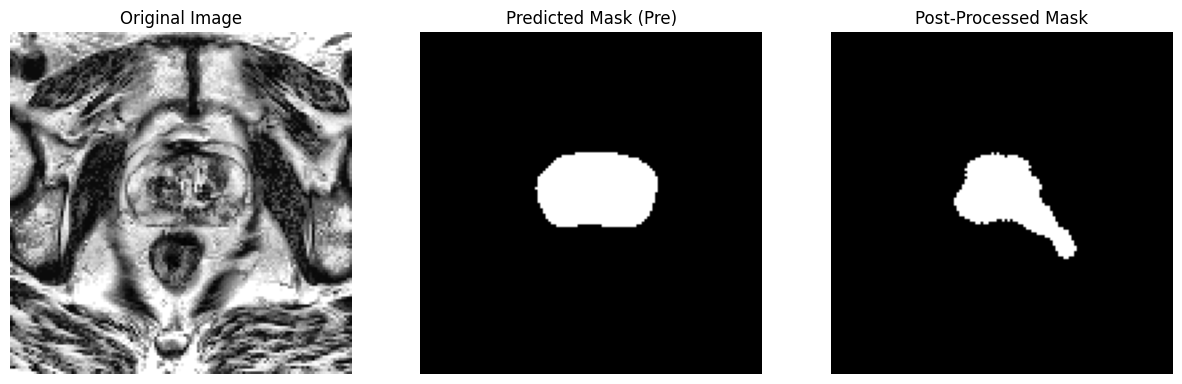

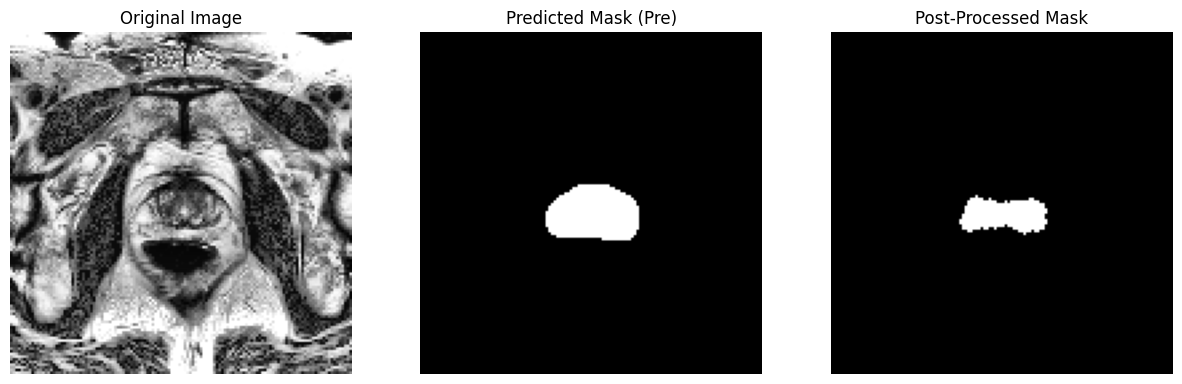

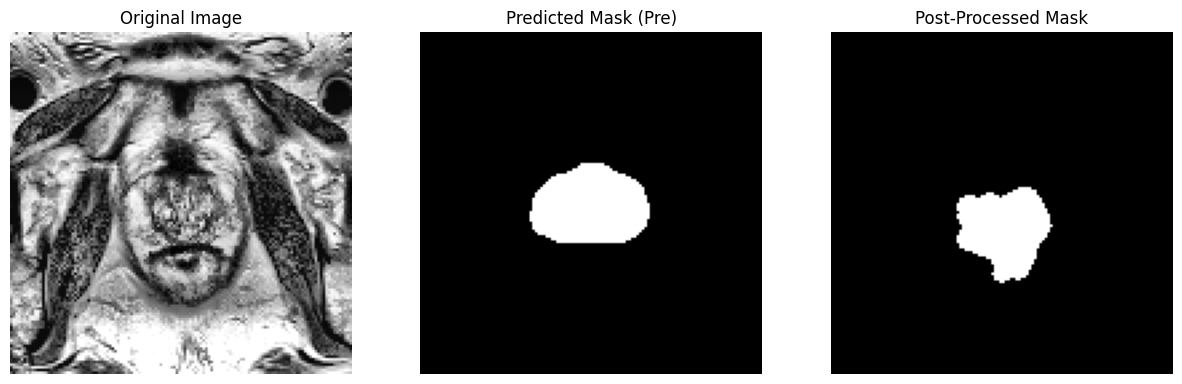

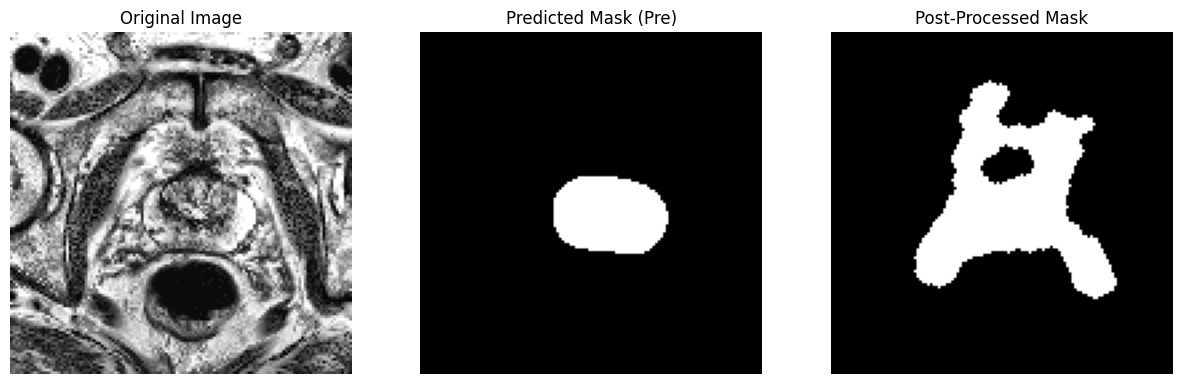

Average Dice Score (Pre-Processing): 0.4229
Average Dice Score (Post-Processing): 0.6119
Average ROC AUC: 0.7702


In [ ]:
from skimage.morphology import binary_closing, binary_opening, disk
from skimage.measure import label, regionprops
import numpy as np

def remove_noncentral_objects(binary_mask, center_fraction=(0.4, 0.6)):
    
    # Get image dimensions
    h, w = binary_mask.shape

    # Define central region
    center_start_y = int(center_fraction[0] * h)
    center_end_y = int(center_fraction[1] * h)
    center_start_x = int(center_fraction[0] * w)
    center_end_x = int(center_fraction[1] * w)

    # Label connected components
    labeled_mask = label(binary_mask)

    # Create an output mask to retain only central objects
    central_mask = np.zeros_like(binary_mask)

    # Iterate through each connected component
    for region in regionprops(labeled_mask):
        # Get the centroid of the region
        cy, cx = region.centroid

        # Check if the centroid is within the central region
        if center_start_y <= cy <= center_end_y and center_start_x <= cx <= center_end_x:
            # Retain this object
            central_mask[labeled_mask == region.label] = 1

    return central_mask

patch_size = 21  # Fixed patch size
subsample_size = 5000  # Fixed subsample size
n_train_patch = 1000  # Patches to extract per image
channels = preprocess_img(np.zeros((128, 128)), nchan=True)  # Number of channels from preprocessing

# Create training set
print(f"Training Random Forest with Patch Size: {patch_size}, Subsample Size: {subsample_size}...")
Y_e, X_e = create_training_set(train_path, n_train_patch, patch_size, channels)

# Subsample the data
Xsub_e, Ysub_e, _ = sub_sample(X_e, Y_e, sample_size=subsample_size)

import gc
X_e = None
Y_e = None
gc.collect()

# Train the Random Forest
rf_model_e = RandomForestClassifier(n_estimators=100, random_state=1)
rf_model_e.fit(Xsub_e, Ysub_e)

print("Random Forest training completed.")

dice_scores_pre = []
dice_scores_post = []
roc_aucs = []

structuring_element = disk(3)  # Structuring element for morphological operations

for val_idx in range(30,40): 
    img, mask = rimg(vali_path, val_idx)  # Load validation image and mask
    img_processed = preprocess_img(img)  # Preprocess the image
    

    # Extract patches from the validation image
    patch_dim = (patch_size, patch_size)
    patch_cnt = patch_size // 2
    frames = preprocess_img(img)
    patches = image.extract_patches_2d(frames, patch_dim)

    # Predict labels for patches
    patches_flat = patches[:, :, :, :channels].reshape(patches.shape[0], -1)
    pred_labels = rf_model_e.predict(patches_flat)

    # Reconstruct the mask from predicted labels
    pred_mask = np.zeros_like(mask)
    valid_rows = mask.shape[0] - 2 * patch_cnt
    valid_cols = mask.shape[1] - 2 * patch_cnt
    patch_idx = 0
    for y in range(patch_cnt, patch_cnt + valid_rows):
        for x in range(patch_cnt, patch_cnt + valid_cols):
            pred_mask[y, x] = pred_labels[patch_idx]
            patch_idx += 1

    # Ensure predicted mask is binary
    pred_mask = (pred_mask > 0.5).astype(int)

    # Ensure mask shapes match
    assert mask.shape == pred_mask.shape, f"Shapes mismatch: {mask.shape} vs {pred_mask.shape}"

    # Calculate metrics before post-processing
    dice_pre = (2 * np.sum(pred_mask * mask)) / (np.sum(pred_mask) + np.sum(mask) + 1e-6)
    dice_scores_pre.append(dice_pre)
    
    # Post-process the predicted mask
    post_processed_mask = binary_closing(pred_mask, structuring_element)
    post_processed_mask = binary_opening(post_processed_mask, structuring_element)
    
    post_processed_mask = remove_noncentral_objects(post_processed_mask)


    # Calculate metrics after post-processing
    dice_post = (2 * np.sum(post_processed_mask * mask)) / (np.sum(post_processed_mask) + np.sum(mask) + 1e-6)
    dice_scores_post.append(dice_post)

    # Ensure mask and predicted mask are binary and of consistent type
    mask = mask.astype(int)
    post_processed_mask = post_processed_mask.astype(int)

    # Flatten the masks
    mask_flat = mask.flatten()
    post_processed_mask_flat = post_processed_mask.flatten()

    # Handle single-class edge cases
    if len(np.unique(mask_flat)) < 2:
        print(f"Skipping ROC AUC for validation image {val_idx} due to single-class ground truth.")
        roc_auc = np.nan
    else:
        # Calculate ROC AUC score
        roc_auc = roc_auc_score(mask_flat, post_processed_mask_flat)

    # Append the ROC AUC score
    roc_aucs.append(roc_auc)


    # Visualization for one sample (before and after post-processing)
    if val_idx < 35:  # Show the first 5 validation images
        plt.figure(figsize=(15, 5))
        plt.subplot(1, 3, 1)
        plt.imshow(img, cmap='gray')
        plt.title("Original Image")
        plt.axis("off")

        plt.subplot(1, 3, 2)
        plt.imshow(mask, cmap='gray')
        plt.title("Predicted Mask (Pre)")
        plt.axis("off")

        plt.subplot(1, 3, 3)
        plt.imshow(post_processed_mask, cmap='gray')
        plt.title("Post-Processed Mask")
        plt.axis("off")
        plt.show()

# Average DICE scores before and after post-processing
avg_dice_pre = np.nanmean(dice_scores_pre)
avg_dice_post = np.nanmean(dice_scores_post)
avg_roc_auc = np.nanmean(roc_aucs)

print(f"Average Dice Score (Pre-Processing): {avg_dice_pre:.4f}")
print(f"Average Dice Score (Post-Processing): {avg_dice_post:.4f}")
print(f"Average ROC AUC: {avg_roc_auc:.4f}")


My post processing improved the DICE score from 0.42 to 0.61 which is a significant improvement.

## (f) apply to test set

![question3f](images/3f.png)

c:\Users\PEGO\Downloads\materialsm\.venv\Lib\site-packages\skimage\feature\texture.py:360: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


Training Random Forest with Patch Size: 27, Subsample Size: 5000...
Extracting 1000 pataches of size 27x27 from each image.
Extracting data from subject: 0
Extracting data from subject: 1
Extracting data from subject: 2
Extracting data from subject: 3
Extracting data from subject: 4
Extracting data from subject: 5
Extracting data from subject: 6
Extracting data from subject: 7
Extracting data from subject: 8
Extracting data from subject: 9
Extracting data from subject: 10
Extracting data from subject: 11
Extracting data from subject: 12
Extracting data from subject: 13
Extracting data from subject: 14
Extracting data from subject: 15
Extracting data from subject: 16
Extracting data from subject: 17
Extracting data from subject: 18
Extracting data from subject: 19
Extracting data from subject: 20
Extracting data from subject: 21
Extracting data from subject: 22
Extracting data from subject: 23
Extracting data from subject: 24
Extracting data from subject: 25
Extracting data from subject

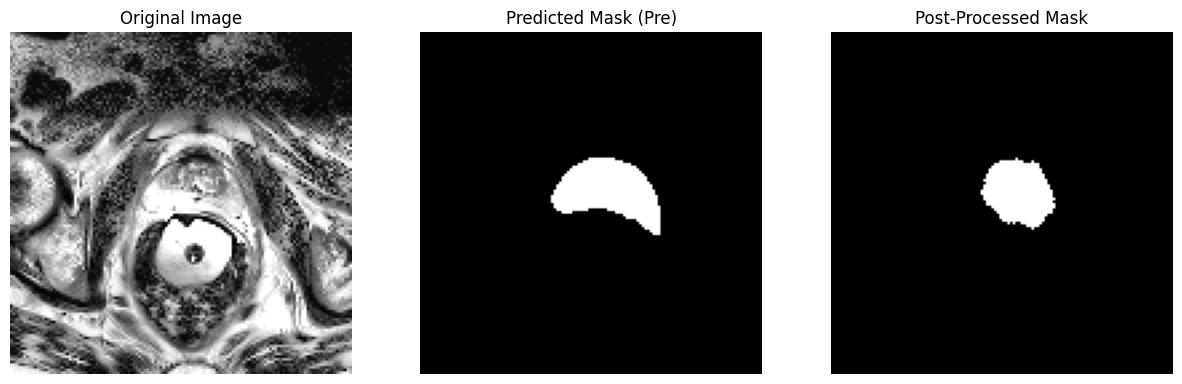

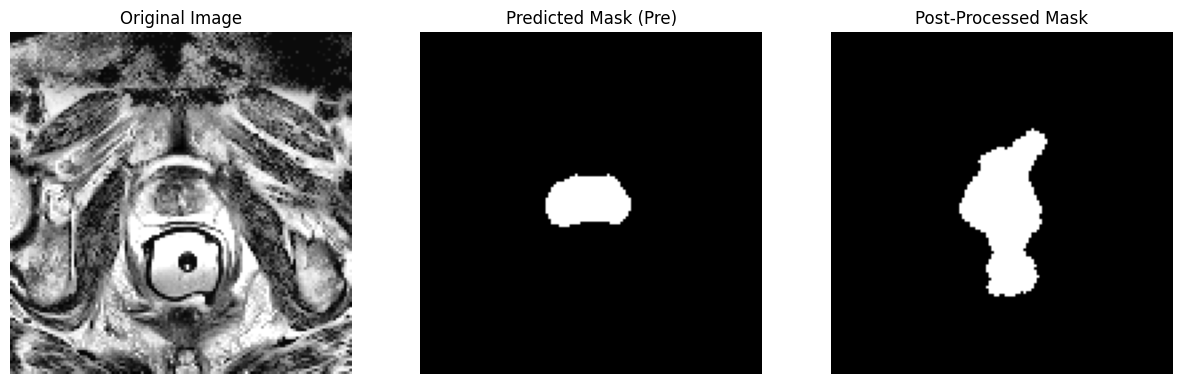

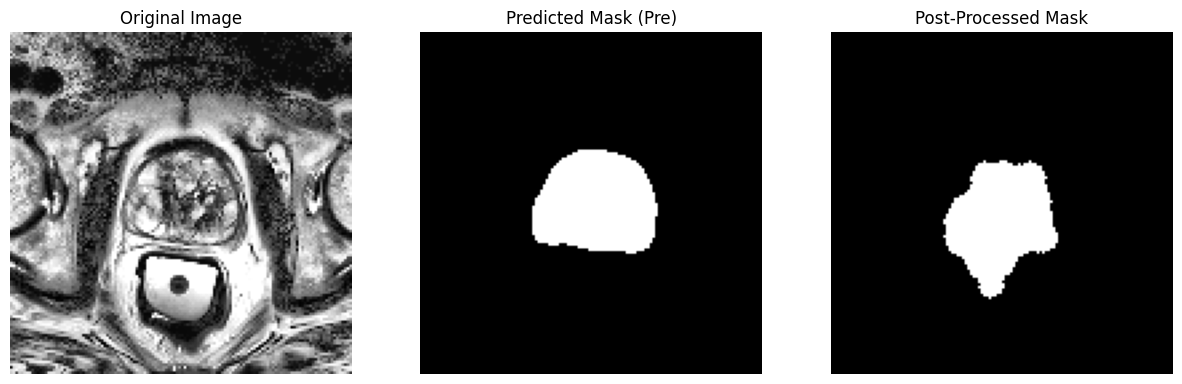

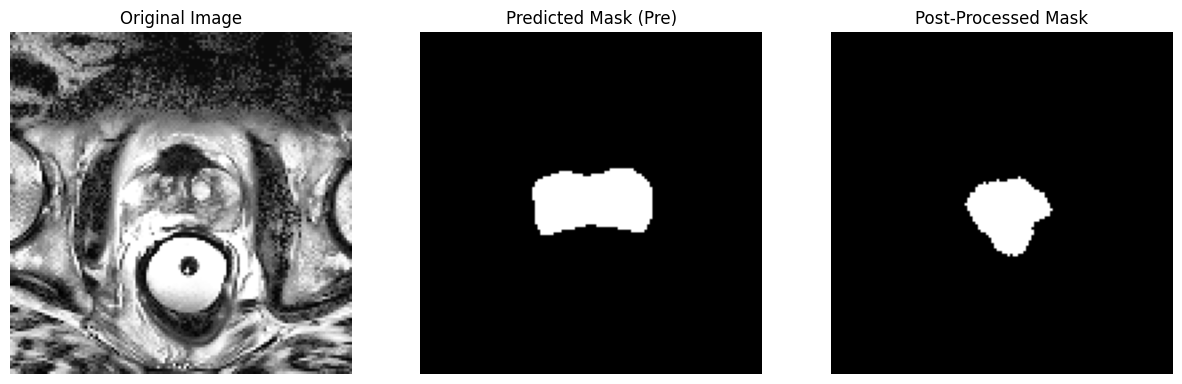

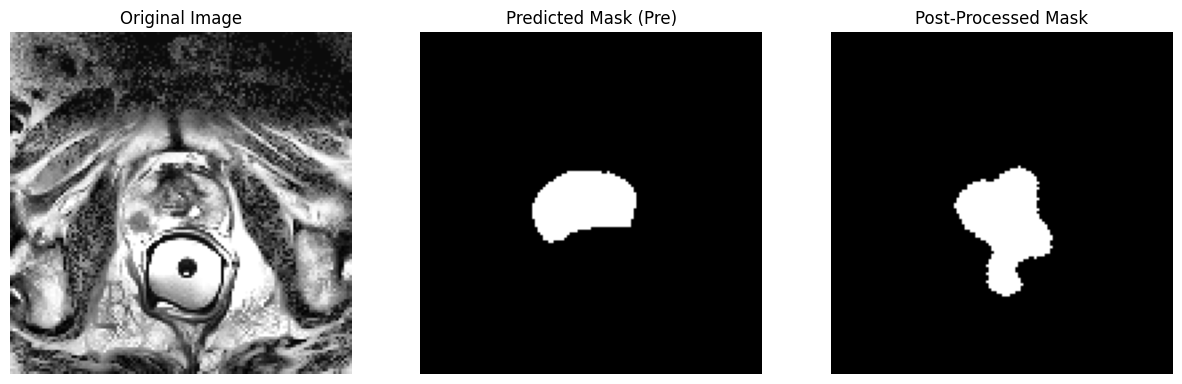

Average Dice Score (Pre-Processing): 0.5977
Average Dice Score (Post-Processing): 0.5998
Average ROC AUC: 0.8281


In [ ]:

from skimage.morphology import binary_closing, binary_opening, disk
from skimage.measure import label, regionprops
from skimage.morphology import remove_small_objects
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction import image
import matplotlib.pyplot as plt
import seaborn as sns
import gc


patch_size = 27  # Fixed patch size
subsample_size = 5000  # Fixed subsample size
n_train_patch = 1000  # Patches to extract per image
channels = preprocess_img(np.zeros((128, 128)), nchan=True)  # Number of channels from preprocessing


# Create training set
print(f"Training Random Forest with Patch Size: {patch_size}, Subsample Size: {subsample_size}...")
Y_f, X_f = create_training_set(train_path, n_train_patch, patch_size, channels)

# Subsample the data
Xsub_f, Ysub_f, _ = sub_sample(X_f, Y_f, sample_size=subsample_size)

import gc
X_f = None
Y_f = None
gc.collect()

# Train the Random Forest
rf_model_f = RandomForestClassifier(n_estimators=100, random_state=1)
rf_model_f.fit(Xsub_f, Ysub_f)

print("Random Forest training completed.")

dice_scores_pre = []
dice_scores_post = []
roc_aucs = []

structuring_element = disk(3)  # Structuring element for morphological operations

for val_idx in range(40,50):
    img, mask = rimg(test_path, val_idx)  # Load test image and mask
    img_processed = preprocess_img(img)  # Preprocess the image

    # Extract patches from the validation image
    patch_dim = (patch_size, patch_size)
    patch_cnt = patch_size // 2
    frames = preprocess_img(img)
    patches = image.extract_patches_2d(frames, patch_dim)

    # Predict labels for patches
    patches_flat = patches[:, :, :, :channels].reshape(patches.shape[0], -1)
    pred_labels = rf_model_f.predict(patches_flat)

    # Reconstruct the mask from predicted labels
    pred_mask = np.zeros_like(mask)
    valid_rows = mask.shape[0] - 2 * patch_cnt
    valid_cols = mask.shape[1] - 2 * patch_cnt
    patch_idx = 0
    for y in range(patch_cnt, patch_cnt + valid_rows):
        for x in range(patch_cnt, patch_cnt + valid_cols):
            pred_mask[y, x] = pred_labels[patch_idx]
            patch_idx += 1

    # Ensure predicted mask is binary
    pred_mask = (pred_mask > 0.5).astype(int)

    # Ensure mask shapes match
    assert mask.shape == pred_mask.shape, f"Shapes mismatch: {mask.shape} vs {pred_mask.shape}"

    # Calculate metrics before post-processing
    dice_pre = (2 * np.sum(pred_mask * mask)) / (np.sum(pred_mask) + np.sum(mask) + 1e-6)
    dice_scores_pre.append(dice_pre)
    
    # Post-process the predicted mask
    post_processed_mask = binary_closing(pred_mask, structuring_element)
    post_processed_mask = binary_opening(post_processed_mask, structuring_element)

    post_processed_mask = remove_noncentral_objects(post_processed_mask)

    # Calculate metrics after post-processing
    dice_post = (2 * np.sum(post_processed_mask * mask)) / (np.sum(post_processed_mask) + np.sum(mask) + 1e-6)
    dice_scores_post.append(dice_post)

    # Handle single-class cases for ROC AUC
    mask = mask.astype(int)
    post_processed_mask = post_processed_mask.astype(int)

    # Flatten the masks
    mask_flat = mask.flatten()
    post_processed_mask_flat = post_processed_mask.flatten()

    # Handle single-class edge cases
    if len(np.unique(mask_flat)) < 2:
        print(f"Skipping ROC AUC for validation image {val_idx} due to single-class ground truth.")
        roc_auc = np.nan
    else:
        # Calculate ROC AUC score
        roc_auc = roc_auc_score(mask_flat, post_processed_mask_flat)

    # Append the ROC AUC score
    roc_aucs.append(roc_auc)

    # Visualization (before and after post-processing)
    if val_idx < 45:  
        plt.figure(figsize=(15, 5))
        plt.subplot(1, 3, 1)
        plt.imshow(img, cmap='gray')
        plt.title("Original Image")
        plt.axis("off")

        plt.subplot(1, 3, 2)
        plt.imshow(mask, cmap='gray')
        plt.title("Predicted Mask (Pre)")
        plt.axis("off")

        plt.subplot(1, 3, 3)
        plt.imshow(post_processed_mask, cmap='gray')
        plt.title("Post-Processed Mask")
        plt.axis("off")
        plt.show()

# Average DICE scores before and after post-processing
avg_dice_pre = np.nanmean(dice_scores_pre)
avg_dice_post = np.nanmean(dice_scores_post)
avg_roc_auc = np.nanmean(roc_aucs)

print(f"Average Dice Score (Pre-Processing): {avg_dice_pre:.4f}")
print(f"Average Dice Score (Post-Processing): {avg_dice_post:.4f}")
print(f"Average ROC AUC: {avg_roc_auc:.4f}")
